In [1]:
import pandas as pd 
data = pd.read_csv("dataset/unemployment.csv") 

In [2]:
counter = 0 #Used for counting the number of nodes [Extracted Users]
for i in range (len(data)):
    counter = counter + 1


In [3]:
nodes={}
for i in range(counter):
    nodes[i]=data['username'][i]
#print(nodes)
mentions={}
j=counter
# for i in range(counter):
#     for k in range(data['mentions'][i].length())
#type(data['mentions'])


In [4]:
#len(data['mentions'][0].split(','))
#data['mentions'][3]
#(data['mentions'][3].strip('][').split(',')[0].strip('""'))
import ast
res = ast.literal_eval(data['mentions'][3]) 
res

[]

In [5]:
# res = data['mentions'][0].strip('][').split(', ') 
# res[0][2]
import ast
k=counter
for i in range(counter):
    res = ast.literal_eval(data['mentions'][i])
    for j in range(len(res)):
        if(len(res[j])>0):
            nodes[k]=res[j]
            k+=1
#nodes




In [6]:
unique_users=set(nodes.values())
user_ind={}
j=0
for i in unique_users:
    user_ind[i]=j
    j+=1
user_ind

{'_yogendrayadav': 0,
 'jjpofficial': 1,
 'drharshvardhan': 2,
 'kuljeetschahal': 3,
 'animasonkar': 4,
 'nrprahulkr': 5,
 'amit9w1': 6,
 'aayushman_kaul': 7,
 'saracasmfun': 8,
 'rahulkanwal': 9,
 'ifliitk01': 10,
 'bsnlcorporate': 11,
 'kapilsibal': 12,
 'rahulgandhi': 13,
 'porwal_shilpi': 14,
 'contestalert_': 15,
 'themurtuza': 16,
 'ss_gurprit': 17,
 'manojtiwarimp': 18,
 'aggarwalsagar': 19,
 'santanu23749559': 20,
 'nitinsehra10': 21,
 'ani': 22,
 'shinedotcom': 23,
 'rajivkumar1': 24,
 '3751bps': 25,
 '_swarajindia': 26,
 'indianexpress': 27,
 'jainasaurus': 28,
 'dchautala': 29,
 'dhcandrewayre': 30,
 'narendramodi': 31,
 'blessedkamal': 32,
 'neeraj_jhaa': 33,
 'contest_hub': 34,
 'tradegovukind': 35,
 'mamataofficial': 36,
 'mayanksharmajan': 37,
 'amaragrawal88': 38,
 'gagan_response': 39,
 'amitshah': 40,
 'dramsinghvi': 41,
 'amitkumar12683': 42,
 'alokg_81': 43,
 'akhilanandchat1': 44,
 'anupamconnects': 45,
 'pmoindia': 46,
 'moca_goi': 47,
 'rsprasad': 48,
 'baxiabhis

In [7]:
import numpy as np
arr=np.zeros([len(unique_users),len(unique_users)],dtype=int)
#user_ind['ani_digital']

In [8]:
for i in range(counter):
    user=data['username'][i]
    res = ast.literal_eval(data['mentions'][i])
    for j in res:
        #print(user,"men",j)
        arr[user_ind[user]][[user_ind[j]]]+=1
val =0
for i in range (len(unique_users)):
    for j in range (len(unique_users)):
        val = max(val,arr[i][j])
      
    

In [9]:
ind_to_user={}
for key in user_ind:
    ind_to_user[user_ind[key]]=key
#ind_to_user

# Algorithm for Graph Construction

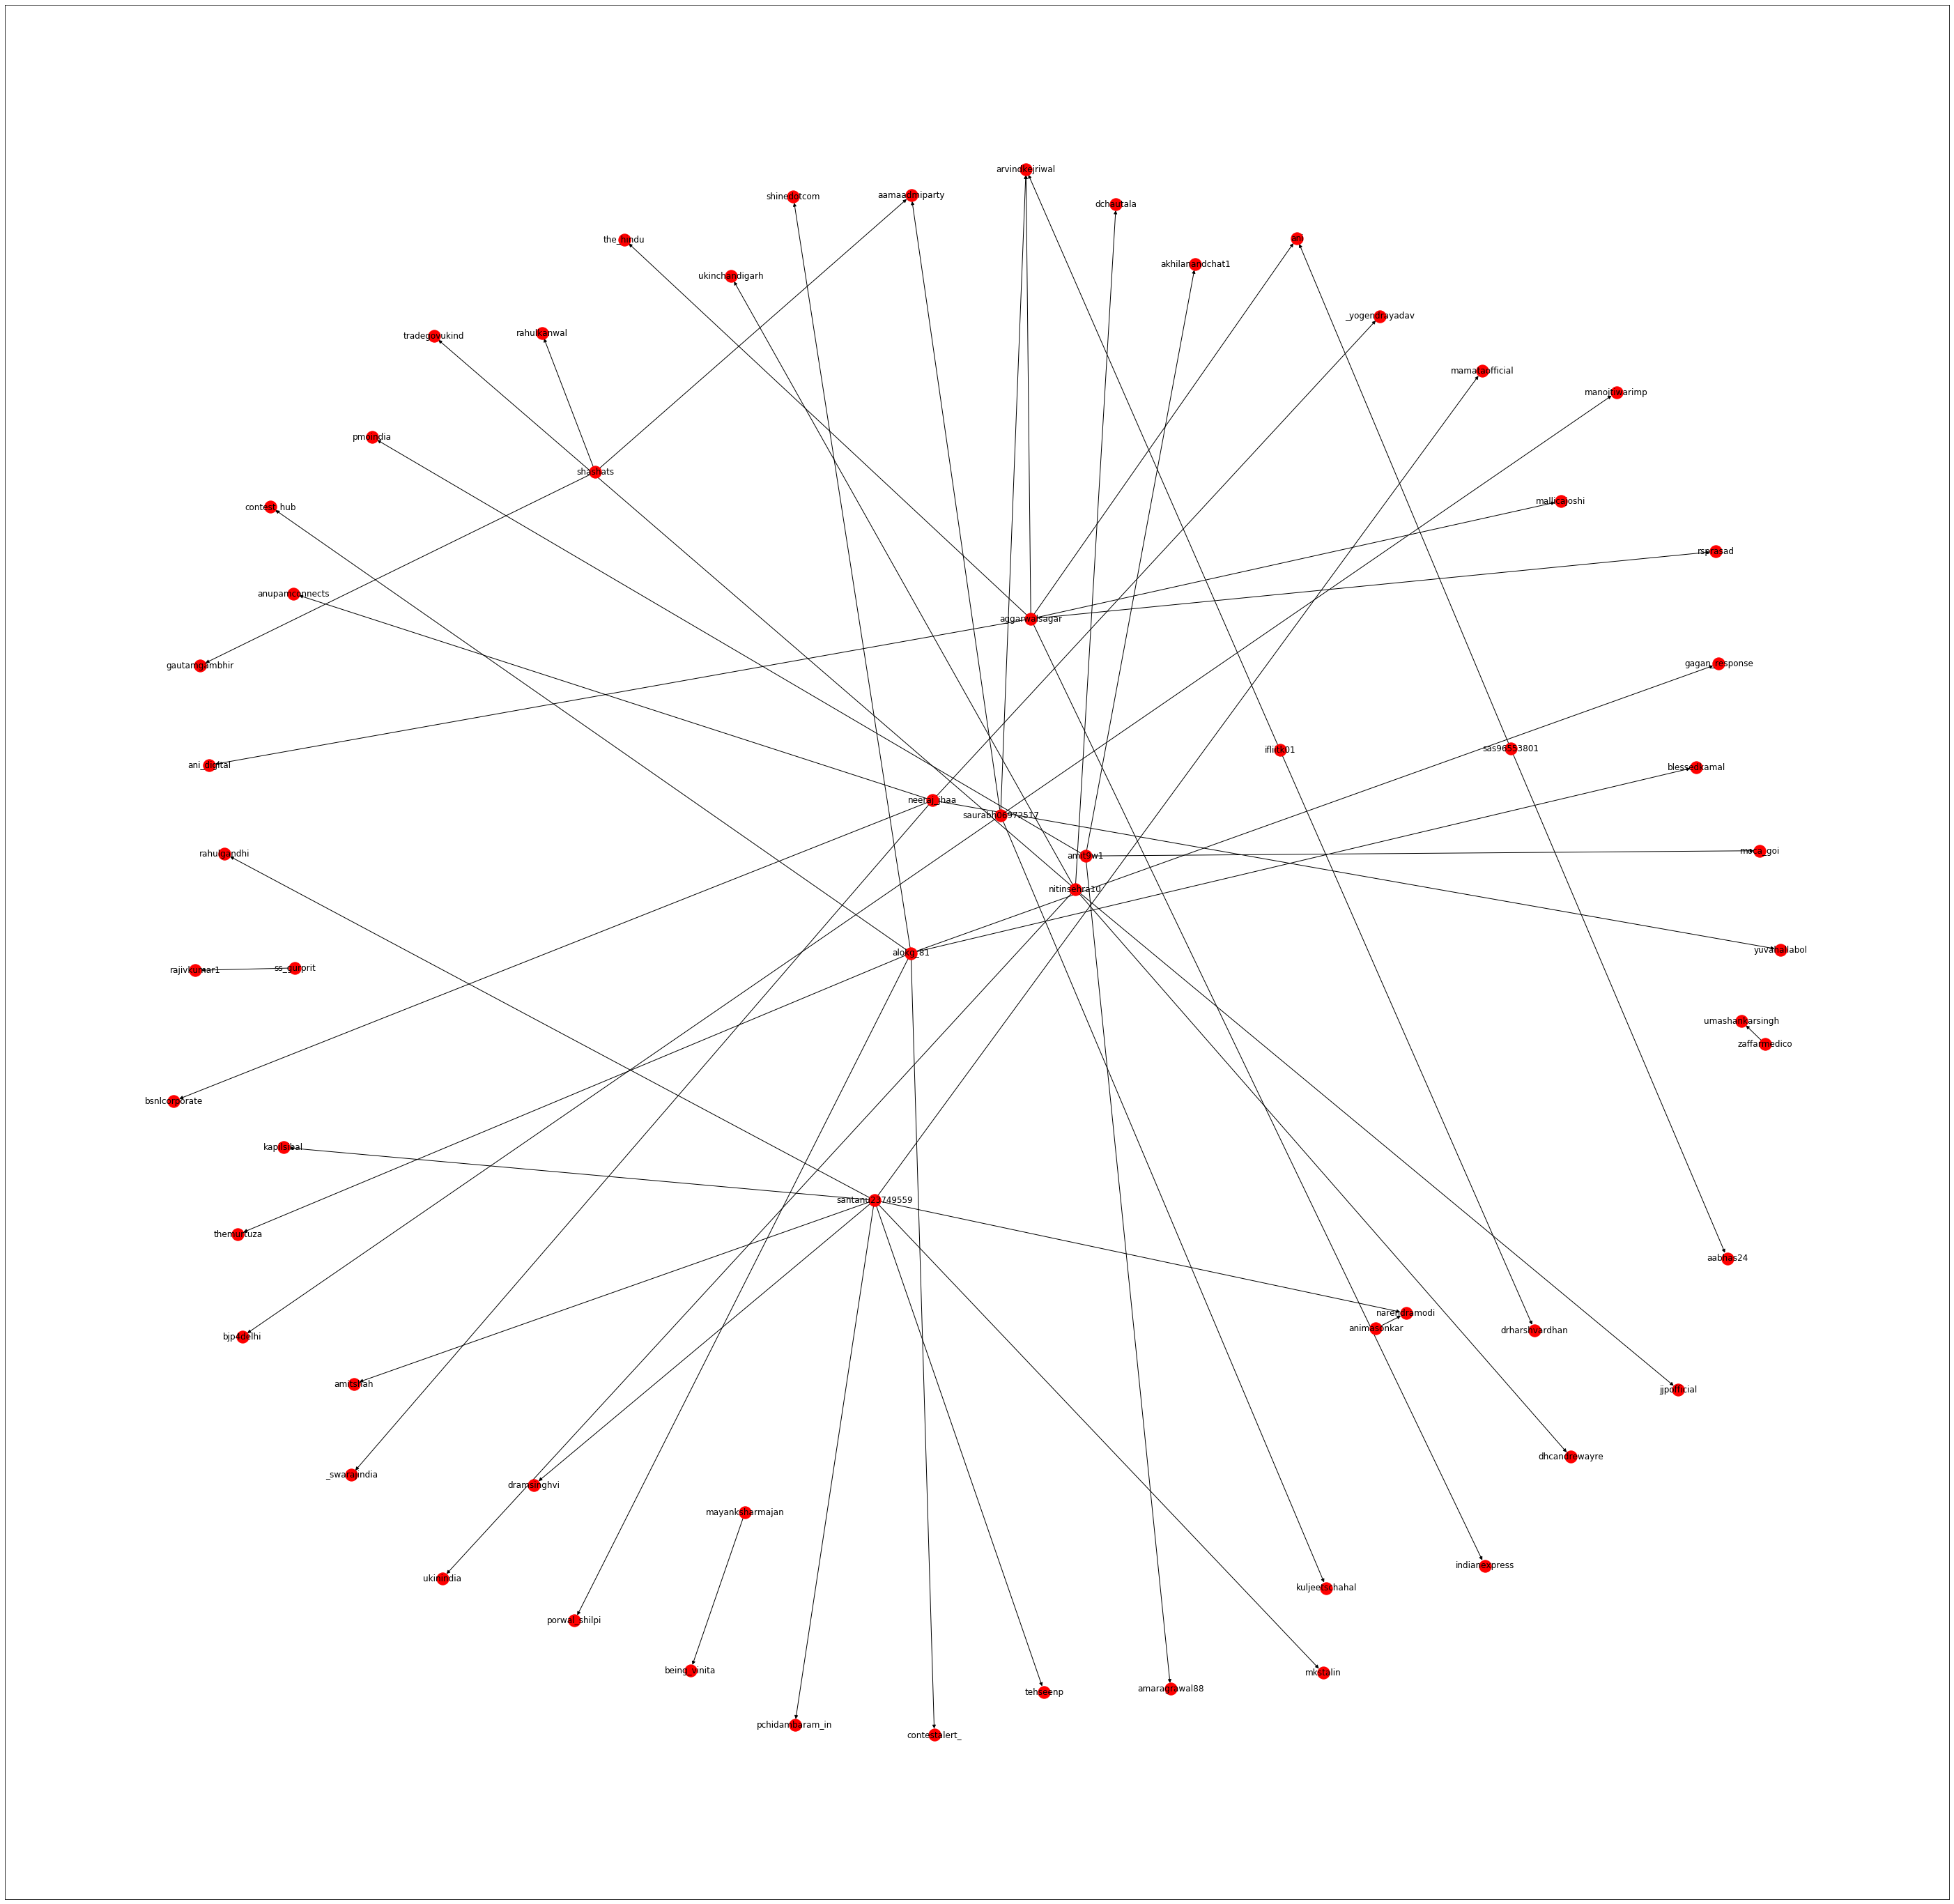

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

Graph=nx.DiGraph()
for i in range(0,len(unique_users)):
    for j in range(0,len(unique_users)):
        if(arr[i][j]>0):
            #print(i,j,arr[i][j])
            Graph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
#         else:
#             if(Graph.has_node(i)==0):
#                 Graph.add_node(names[i])
#             if(Graph.has_node(j)==0):
#                 Graph.add_node(names[j])
            
        
#nx.spring_layout(Graph)
plt.figure(figsize=(50,50))
nx.draw_networkx(Graph,node_size=300, node_color='red', with_labels=True)
plt.savefig("Unemployment.png",format="PNG")

In [11]:
# Function 
def make_graph(file_name):
    path = "dataset/" + file_name
    data = pd.read_csv(path) 
    counter=len(data)
    nodes={}
    for i in range(counter):
        nodes[i]=data['username'][i]
    #print(nodes)
    mentions={}
    j=counter

    k=counter
    for i in range(counter):
        res = ast.literal_eval(data['mentions'][i])
        for j in range(len(res)):
            if(len(res[j])>0):
                nodes[k]=res[j]
                k+=1
    unique_users=set(nodes.values())
    user_ind={}
    j=0
    for i in unique_users:
        user_ind[i]=j
        j+=1
    #user_ind  

    ind_to_user={}
    for key in user_ind:
        ind_to_user[user_ind[key]]=key

    arr=np.zeros([len(unique_users),len(unique_users)],dtype=int)
    for i in range(counter):
        user=data['username'][i]
        res = ast.literal_eval(data['mentions'][i])
        for j in res:
            #print(user,"men",j)
            arr[user_ind[user]][[user_ind[j]]]+=1
    val =0
    for i in range (len(unique_users)):
        for j in range (len(unique_users)):
            val = max(val,arr[i][j])

    Graph=nx.Graph()
    DiGraph = nx.DiGraph();
    for i in range(0,len(unique_users)):
        for j in range(0,len(unique_users)):
            if(arr[i][j]>0):
                #print(i,j,arr[i][j])
                Graph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
                DiGraph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
            else:
                if(Graph.has_node(i)==0):
                    Graph.add_node(ind_to_user[i])
                if(Graph.has_node(j)==0):
                    Graph.add_node(ind_to_user[j])


    #nx.spring_layout(Graph)
    plt.figure(figsize=(50,50))
    nx.draw_networkx(Graph,node_size=300, node_color='red', with_labels=True)
    return DiGraph
    #plt.savefig("education.png",format="PNG")


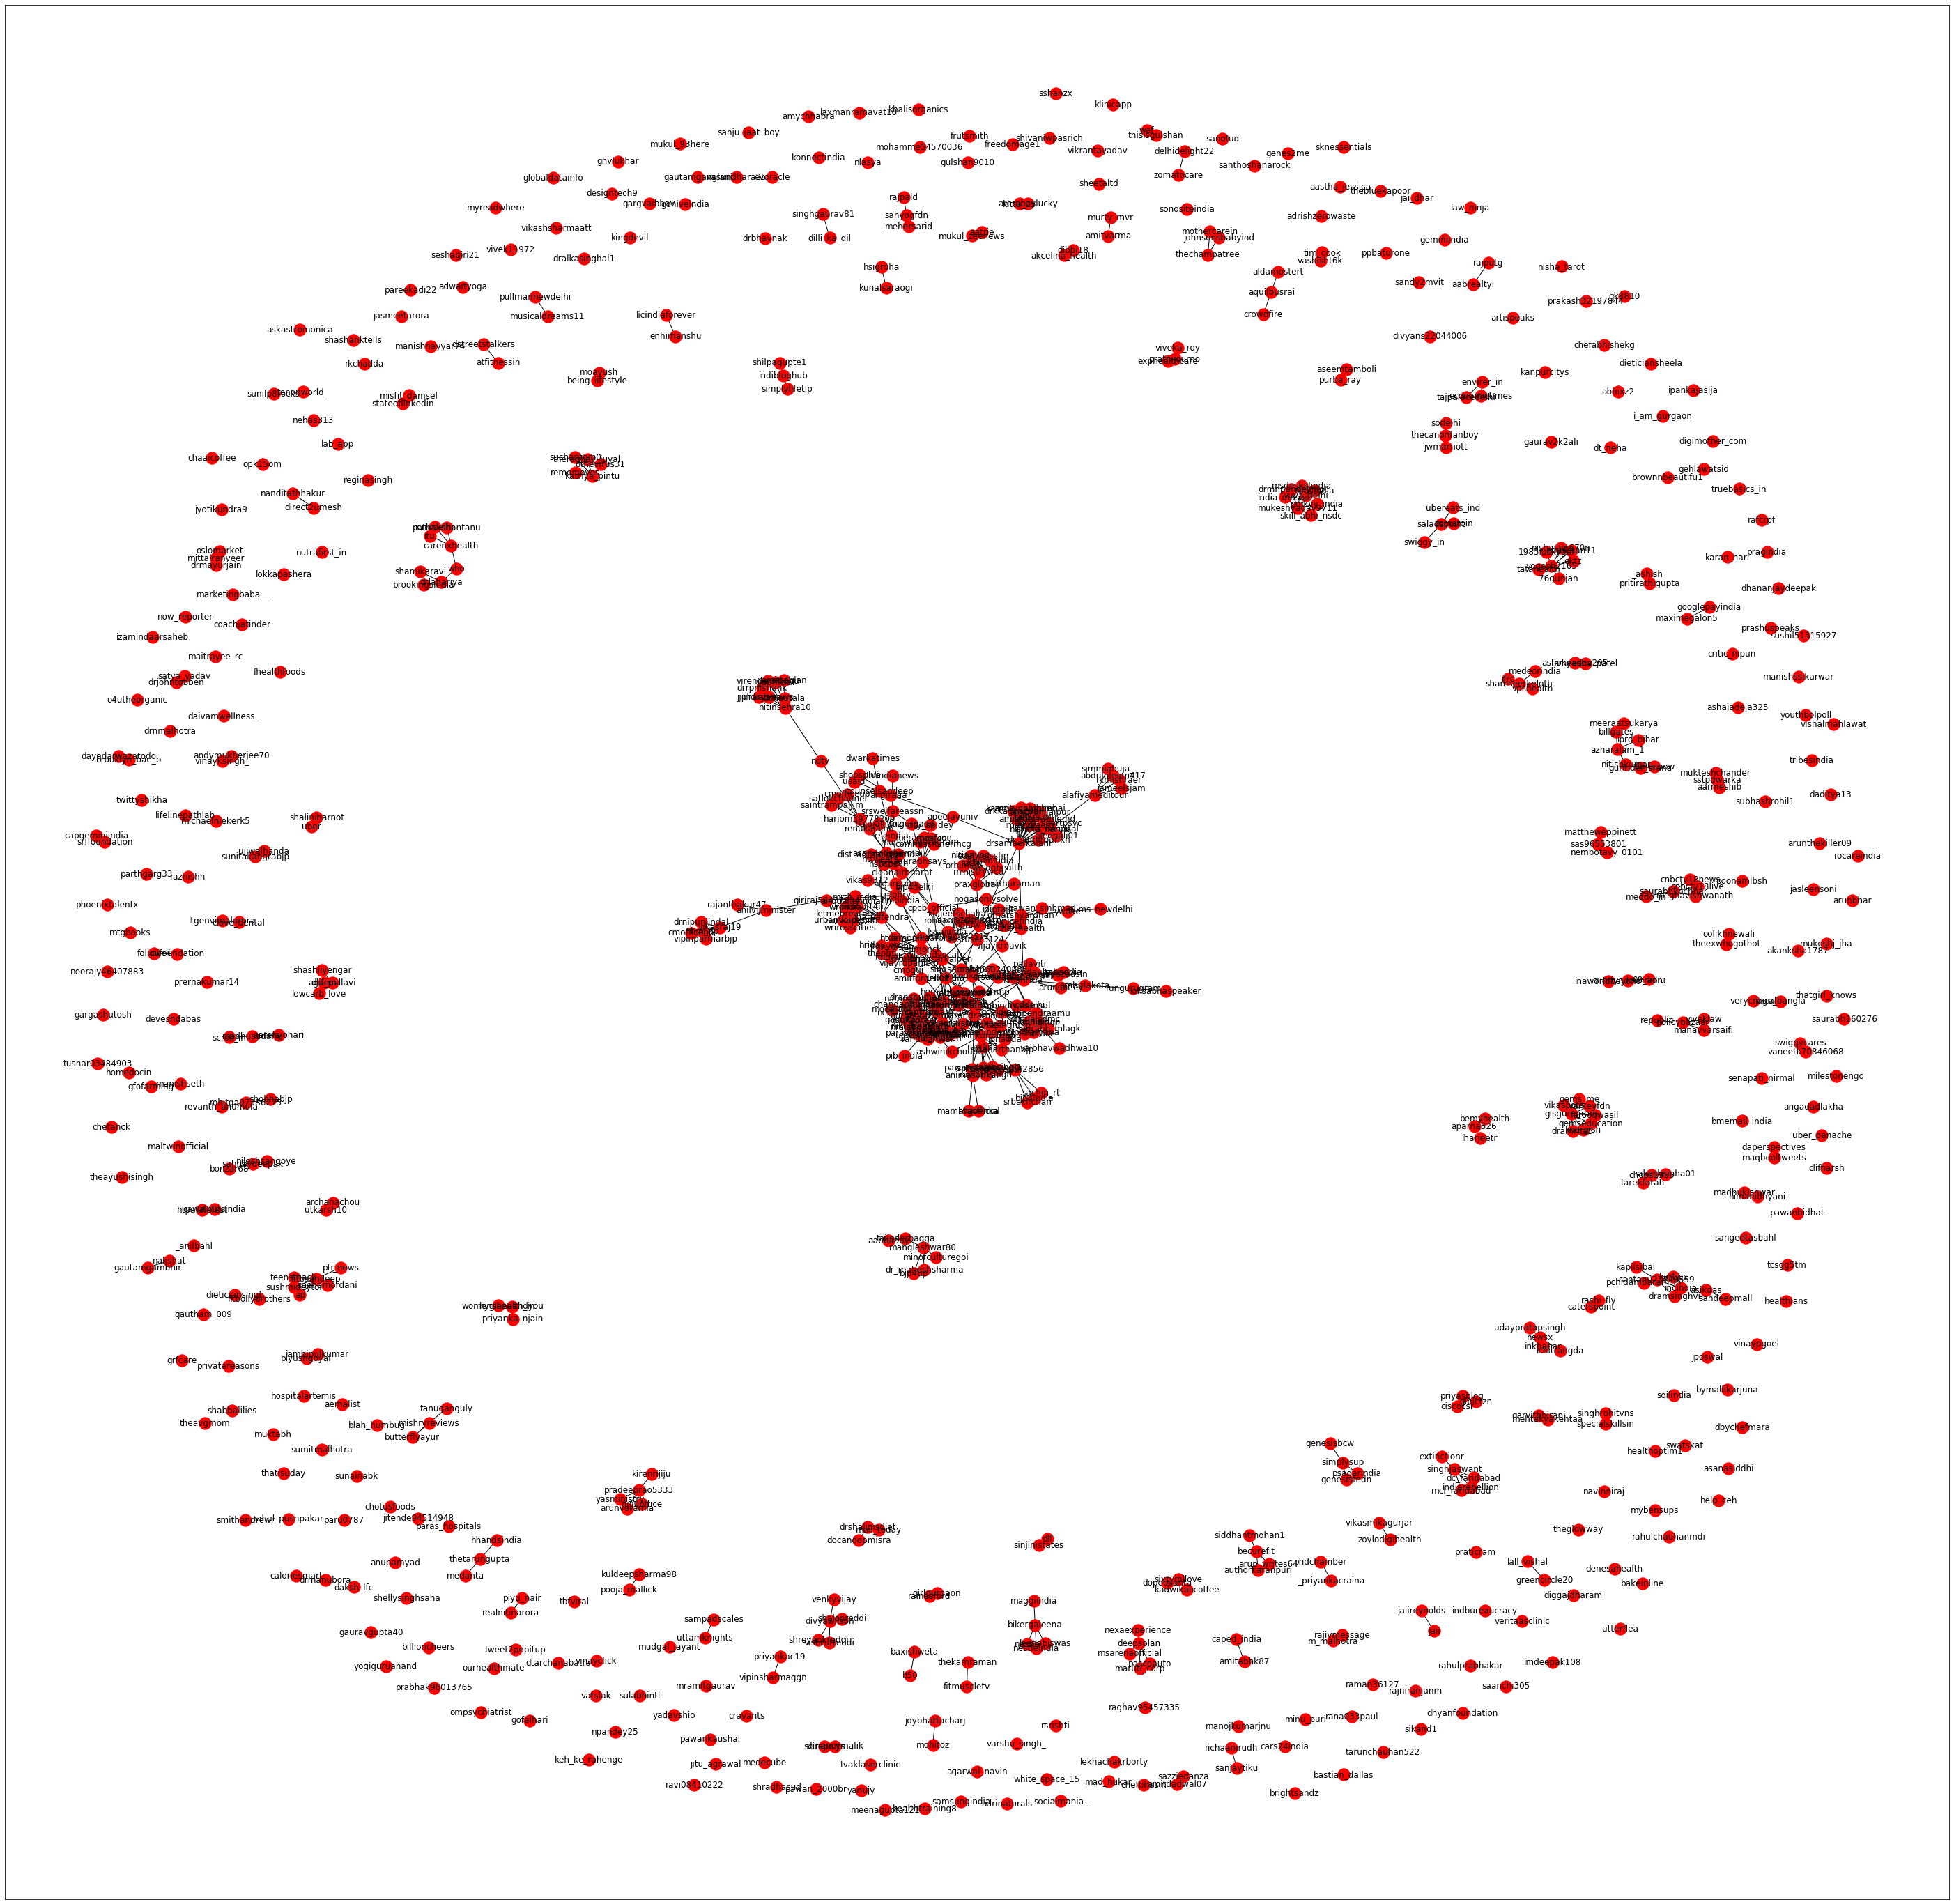

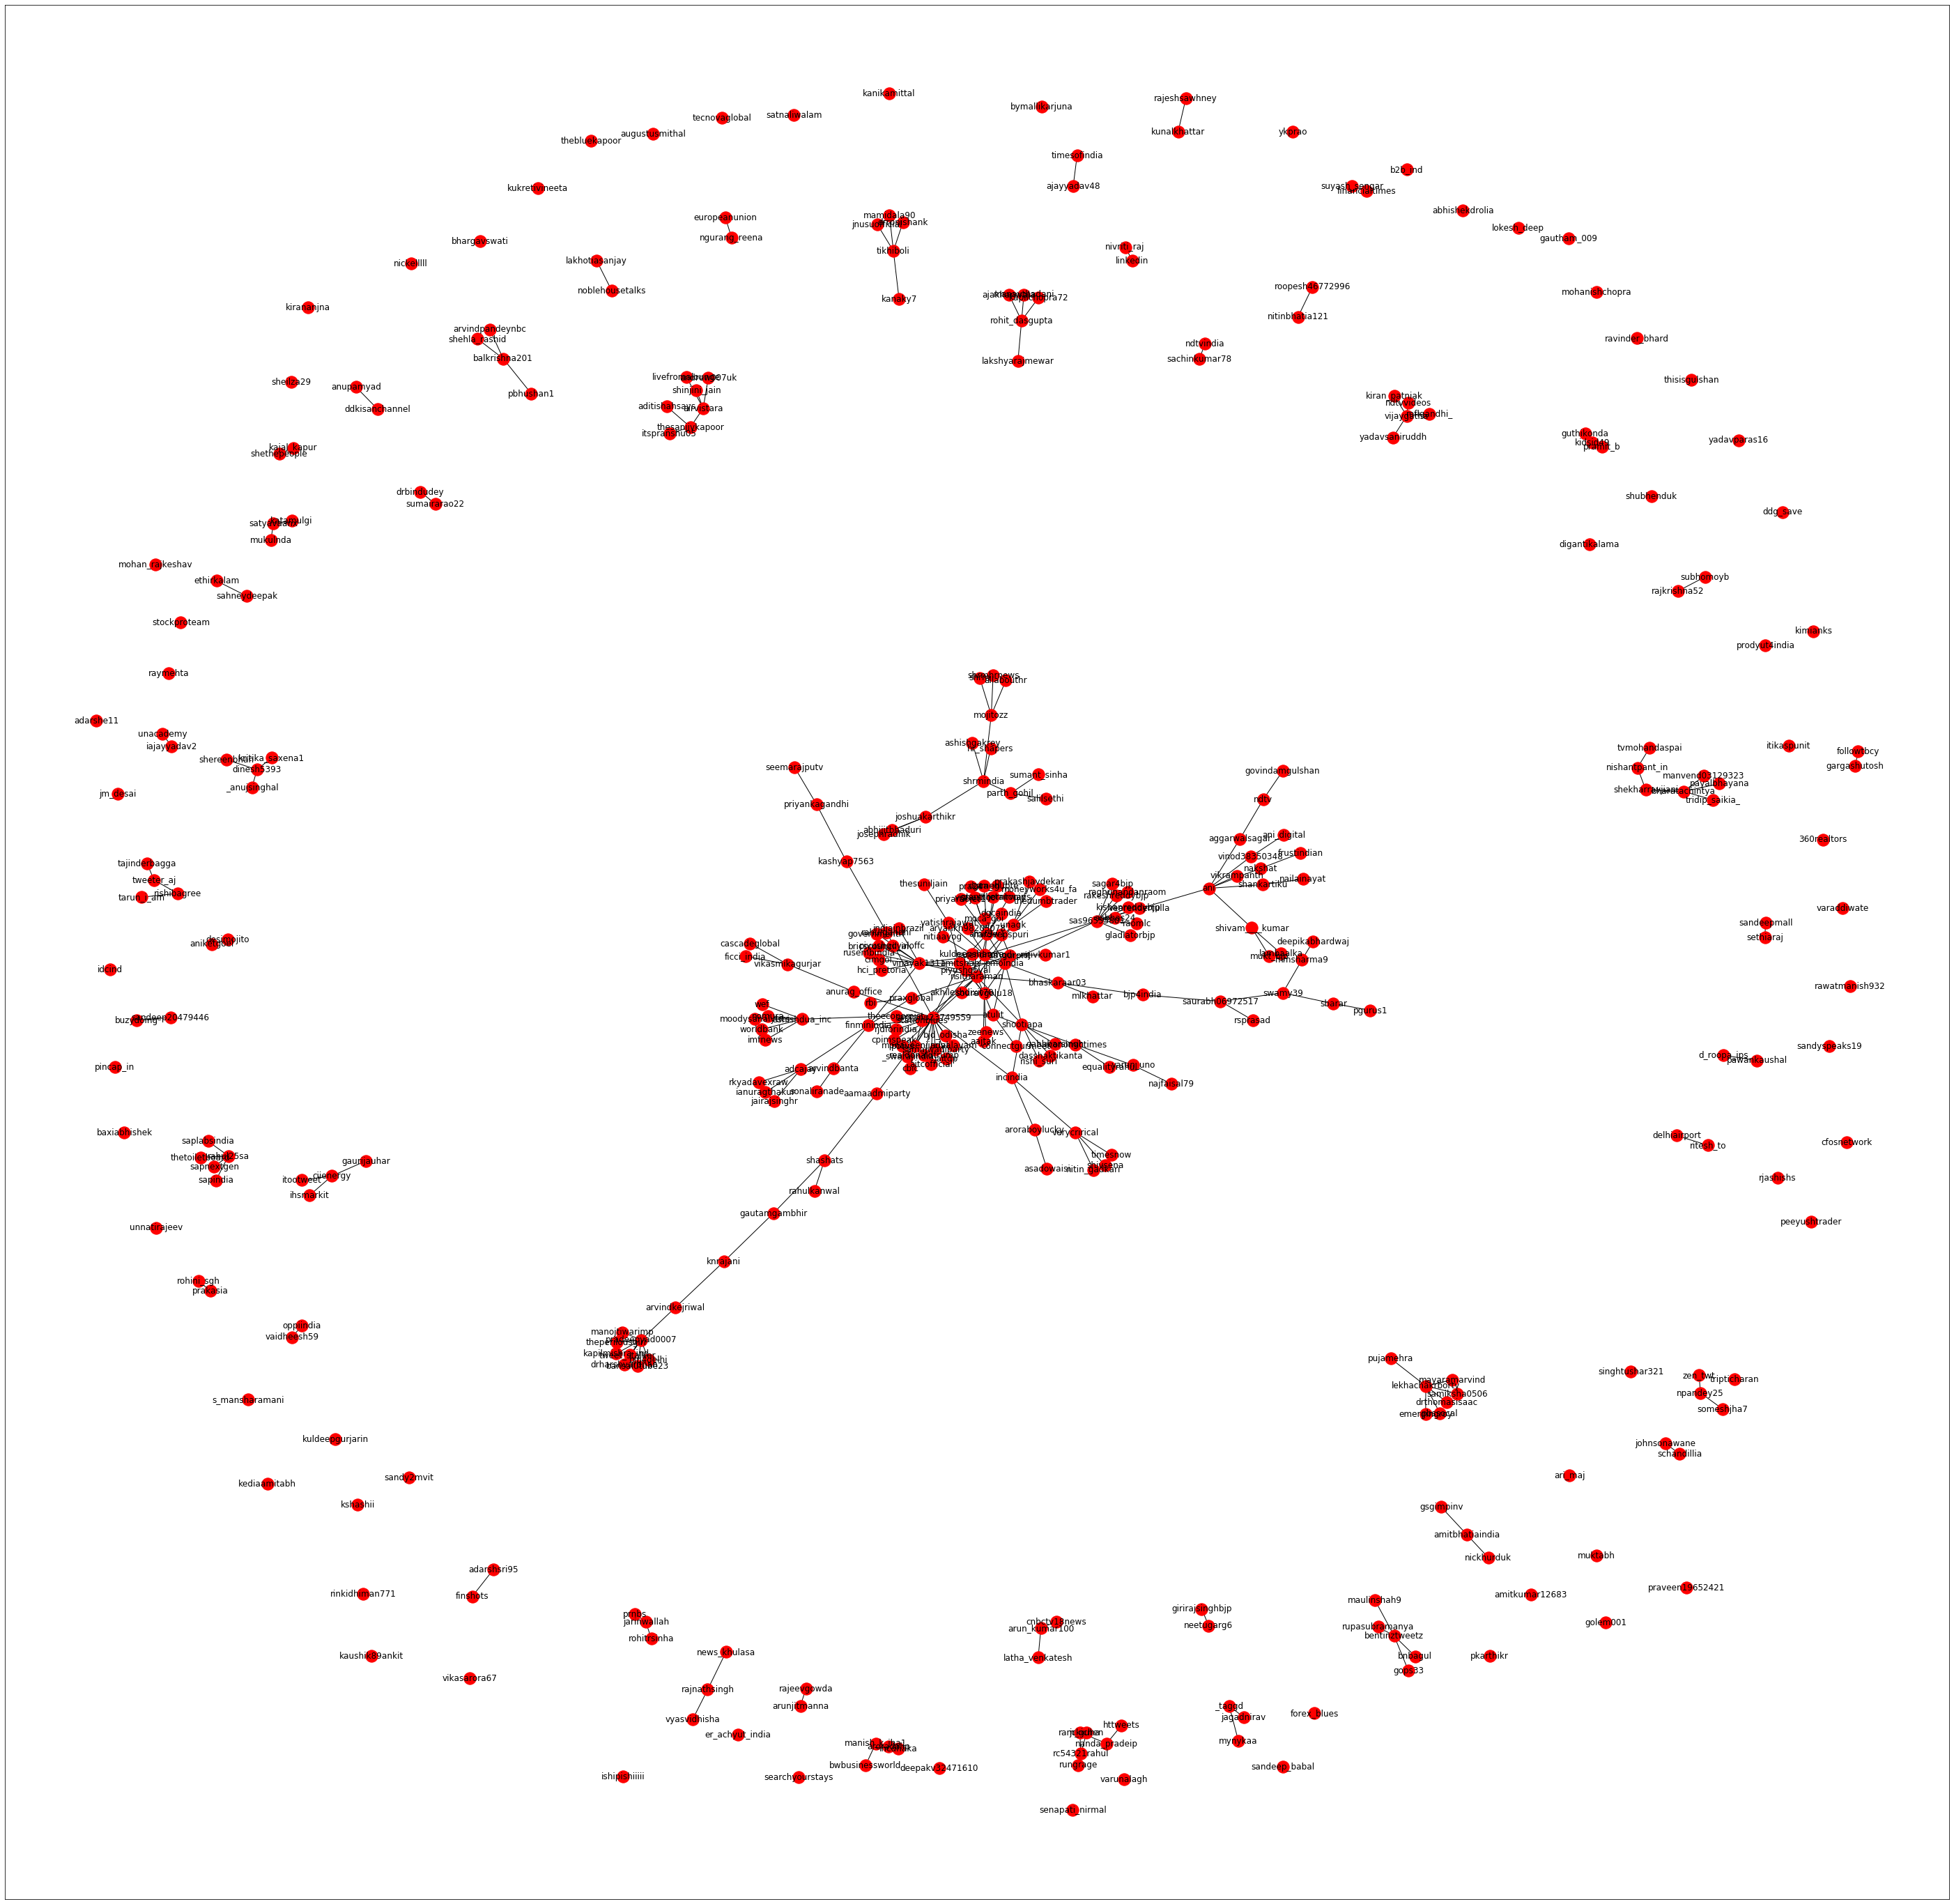

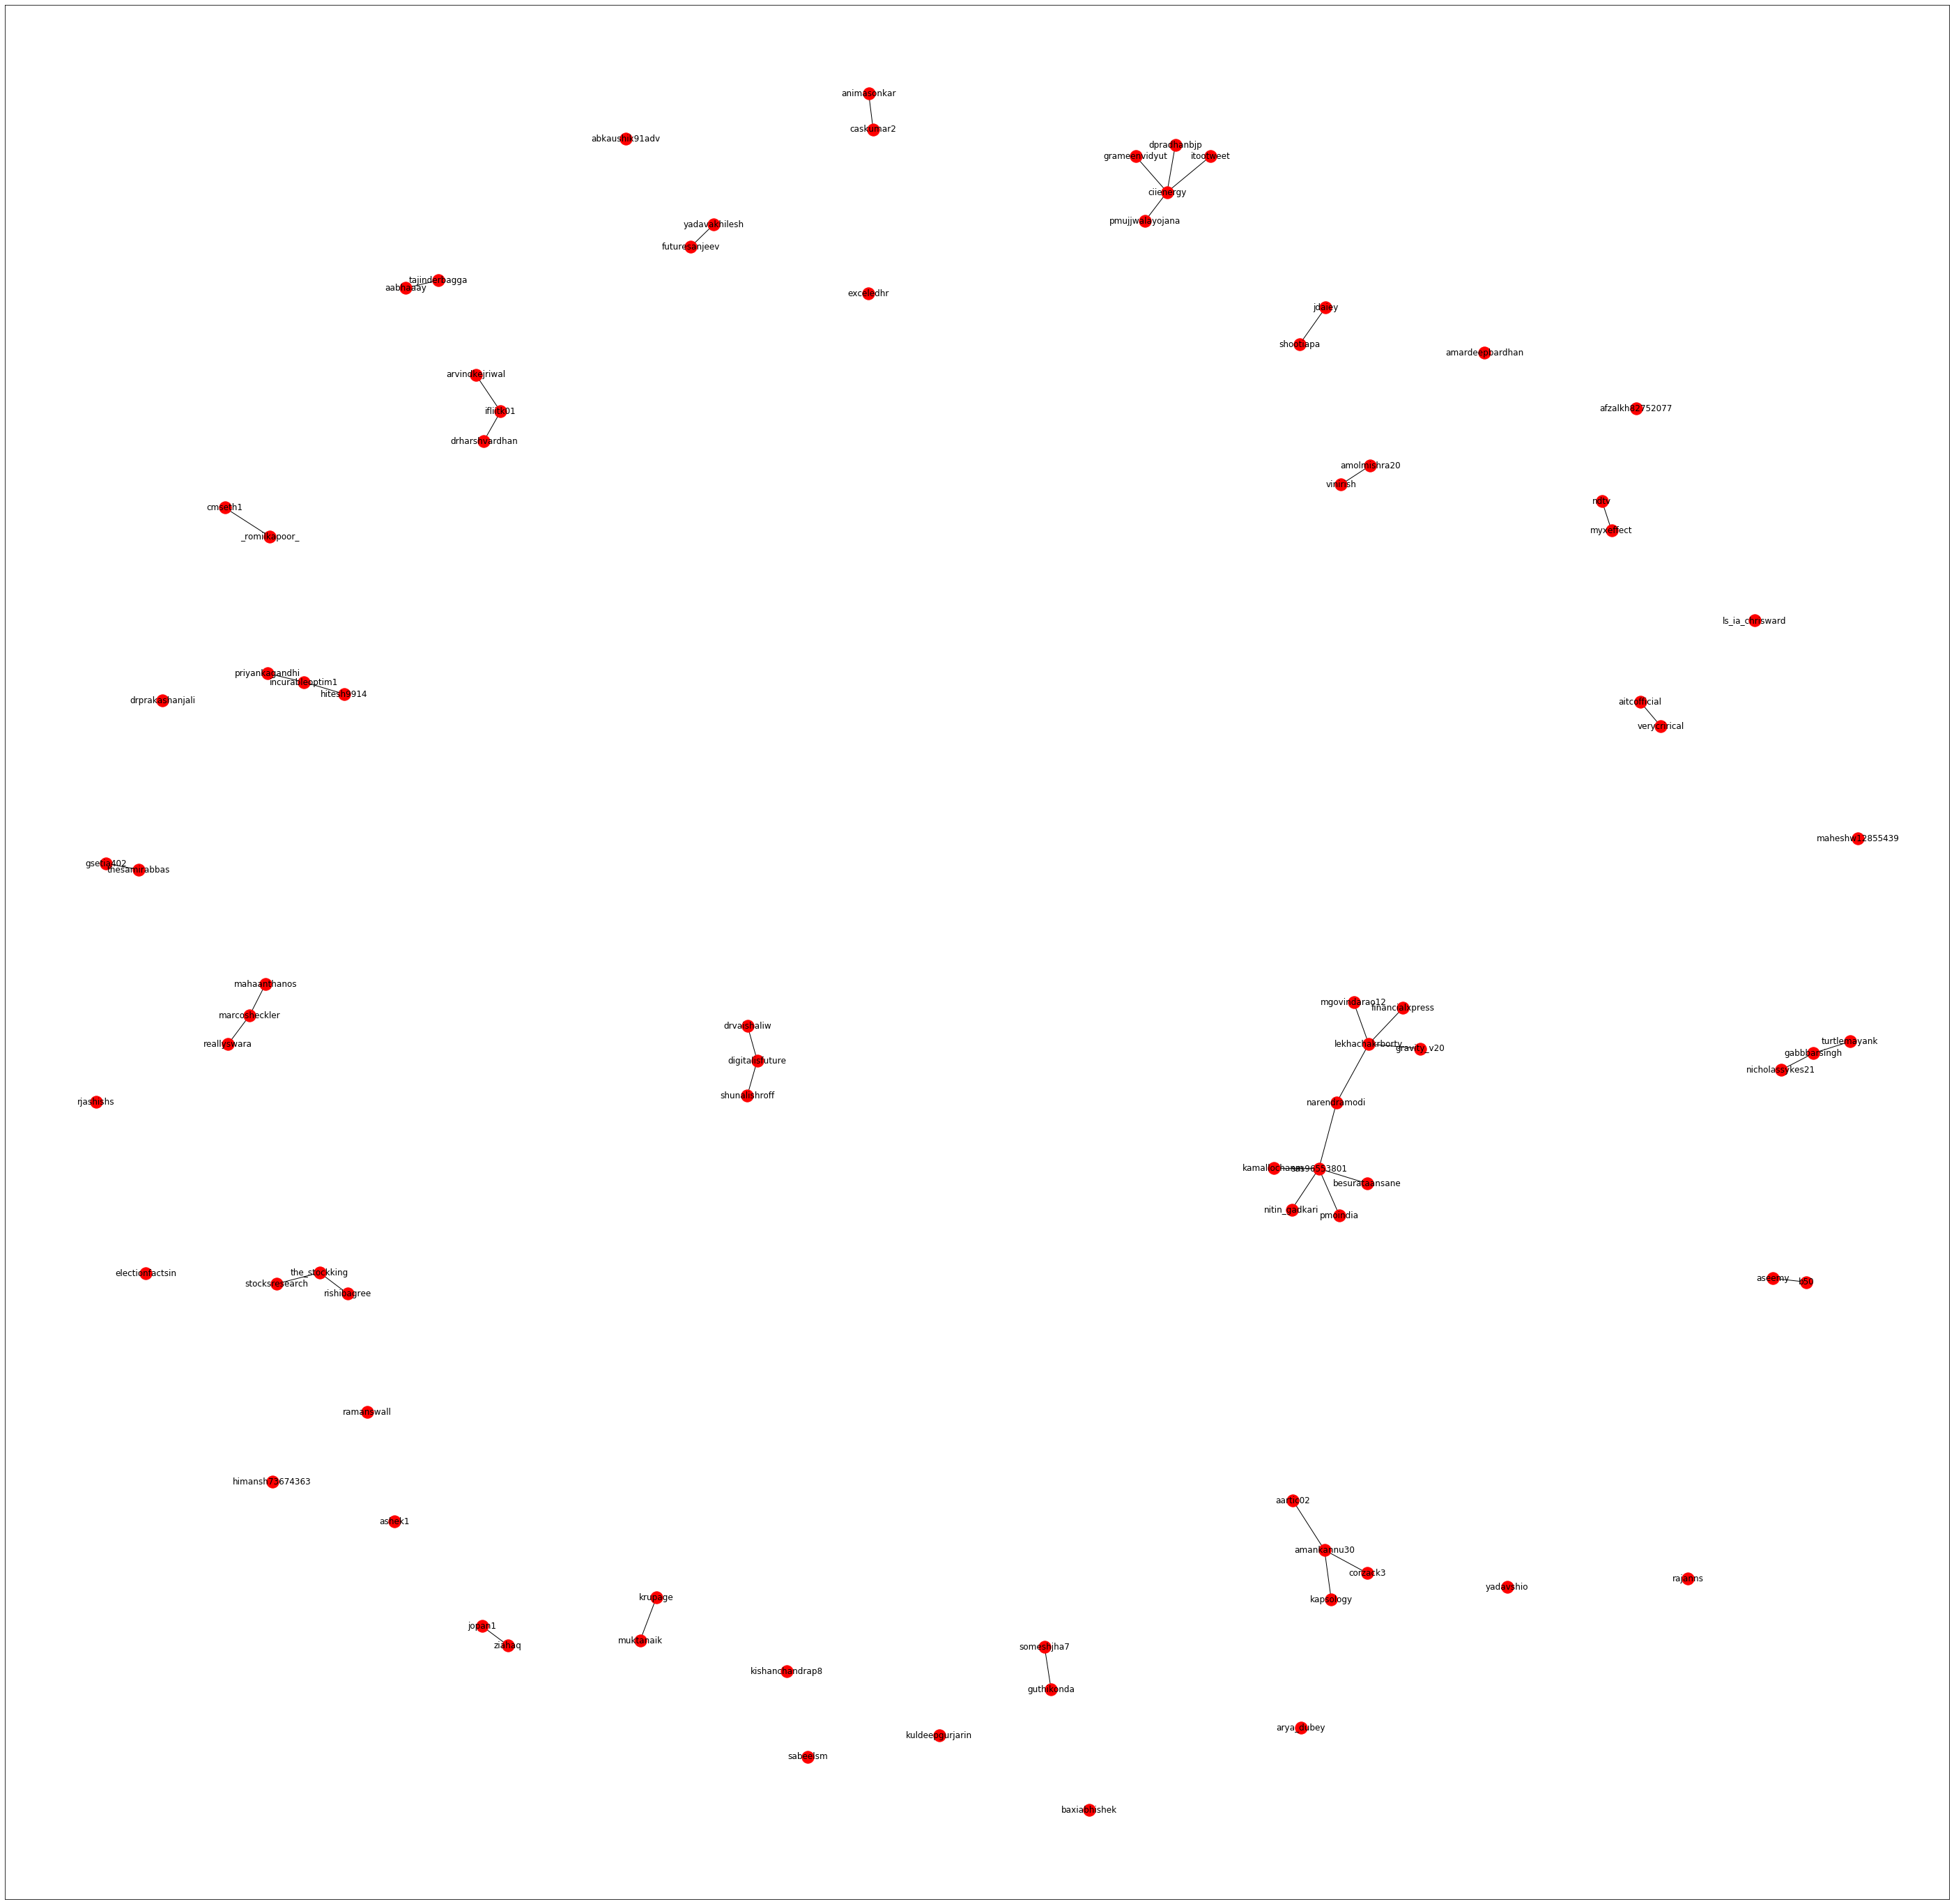

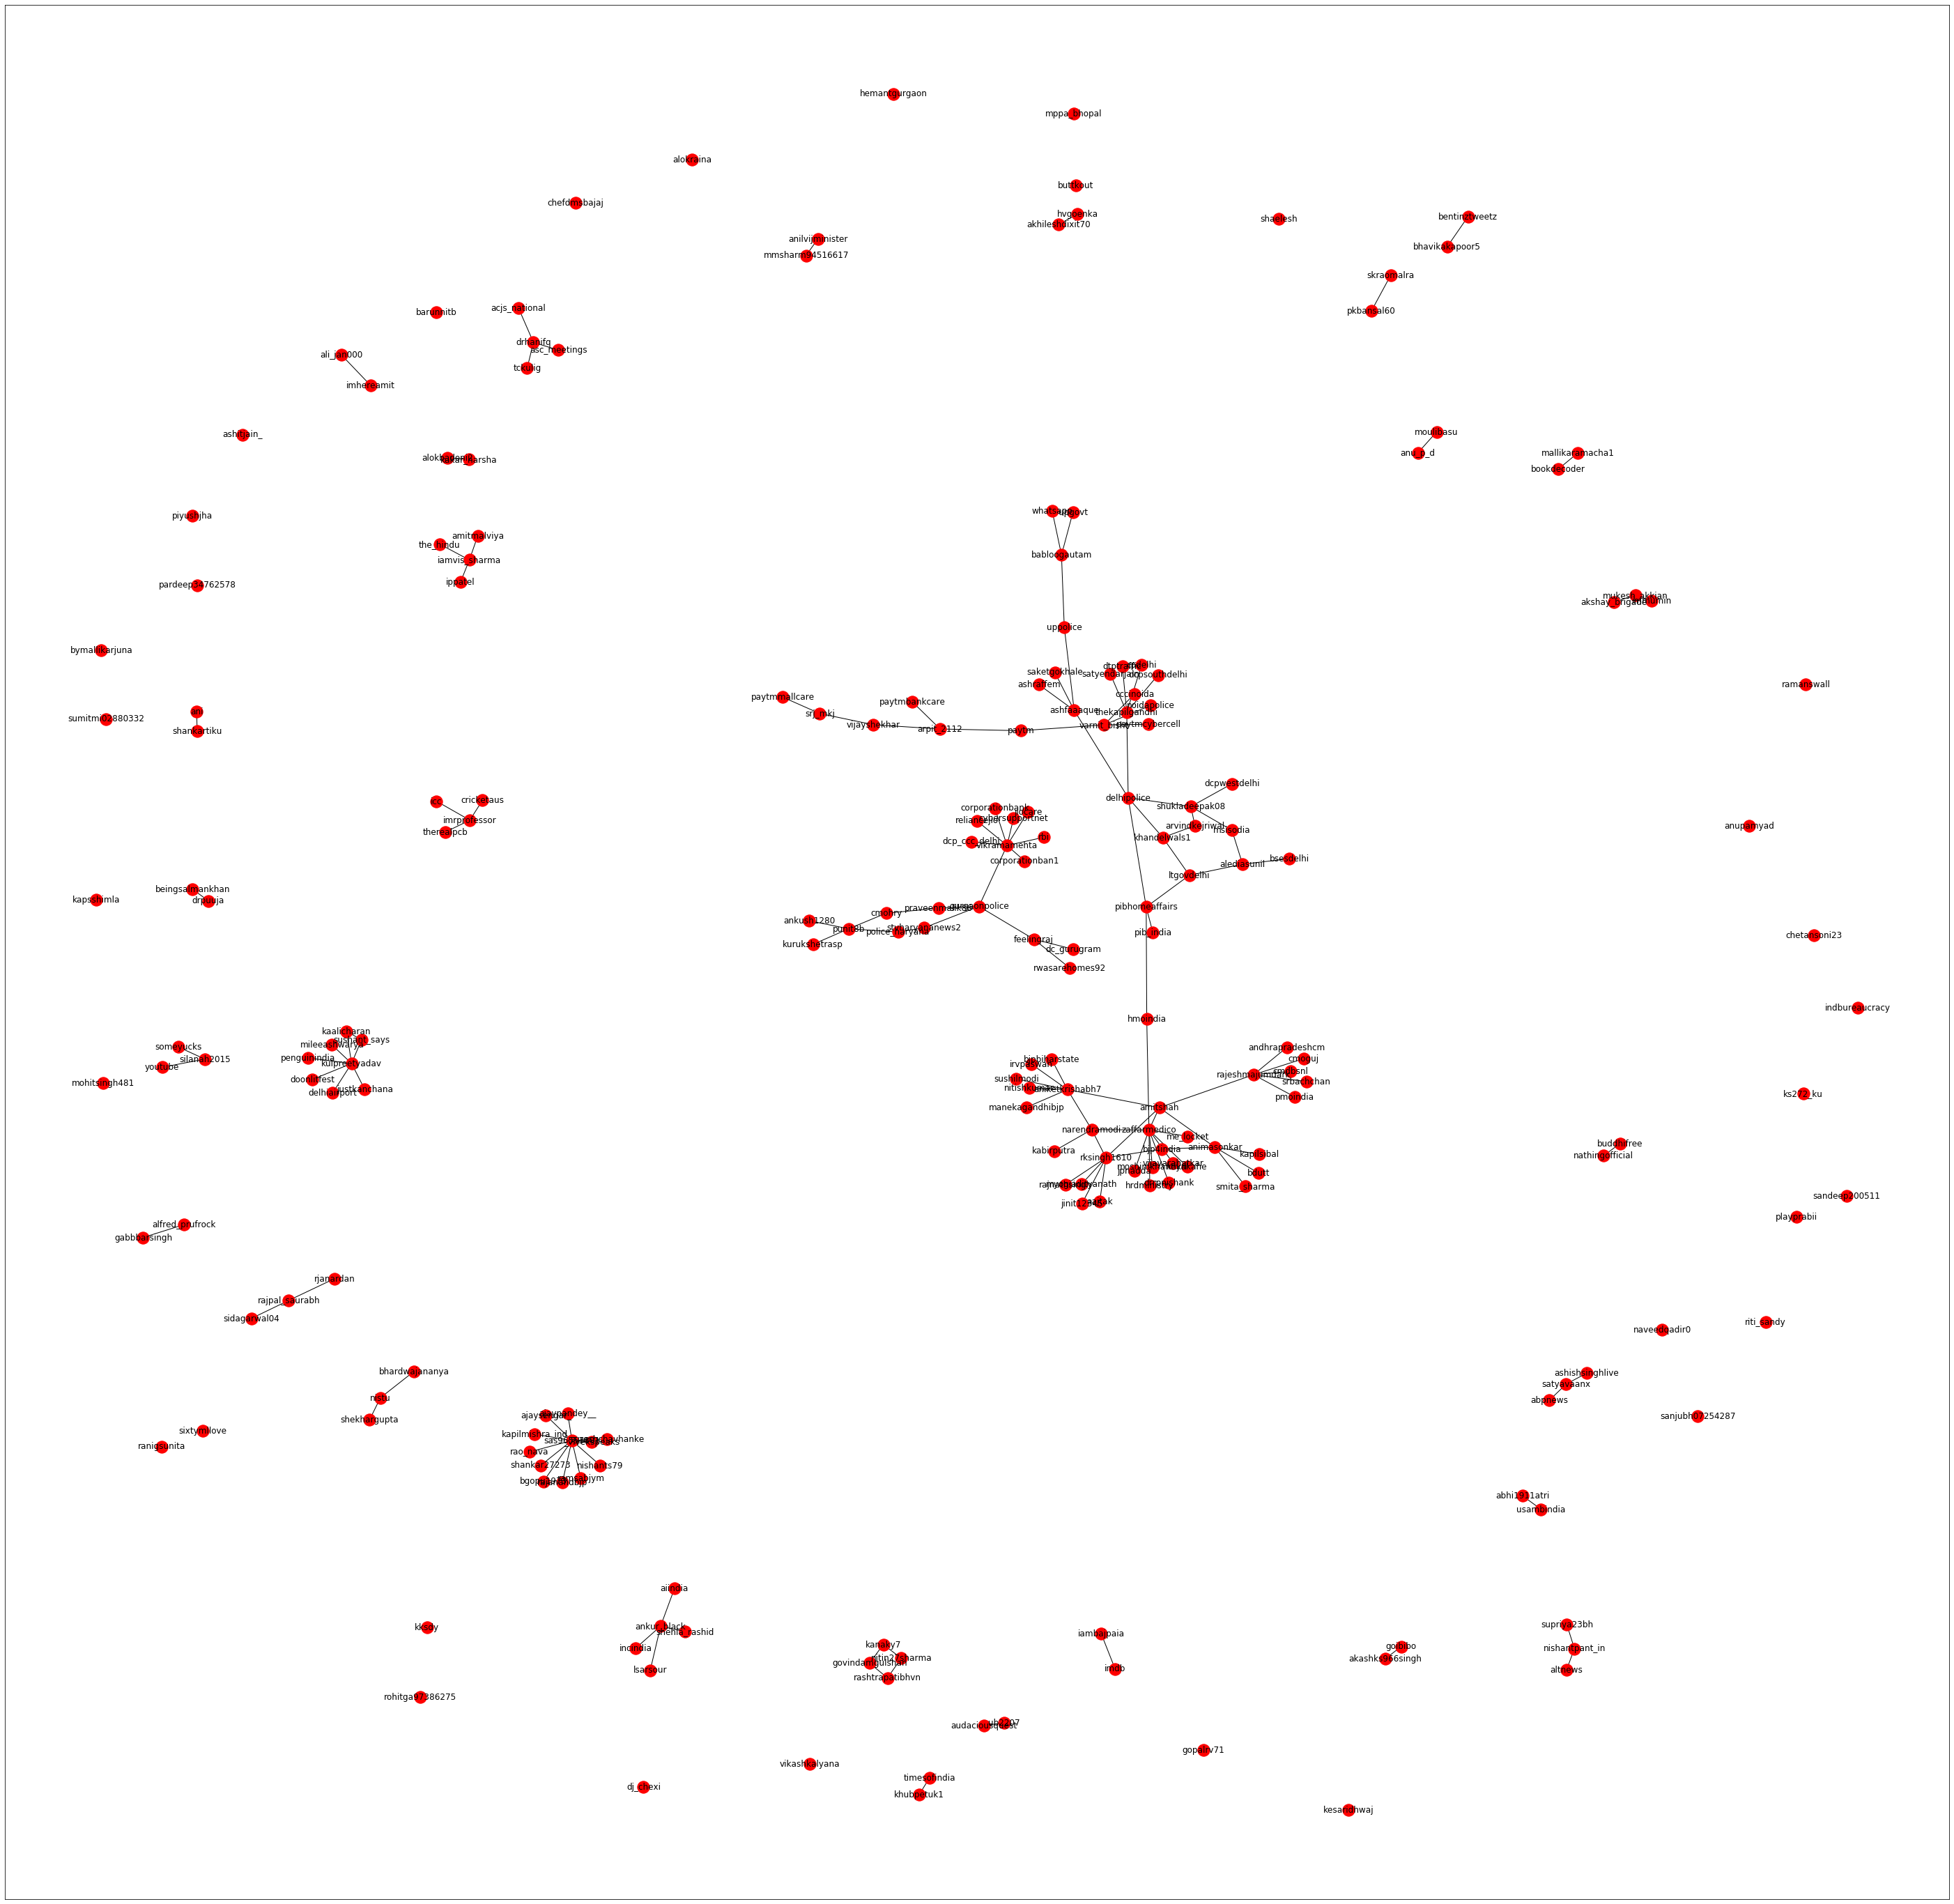

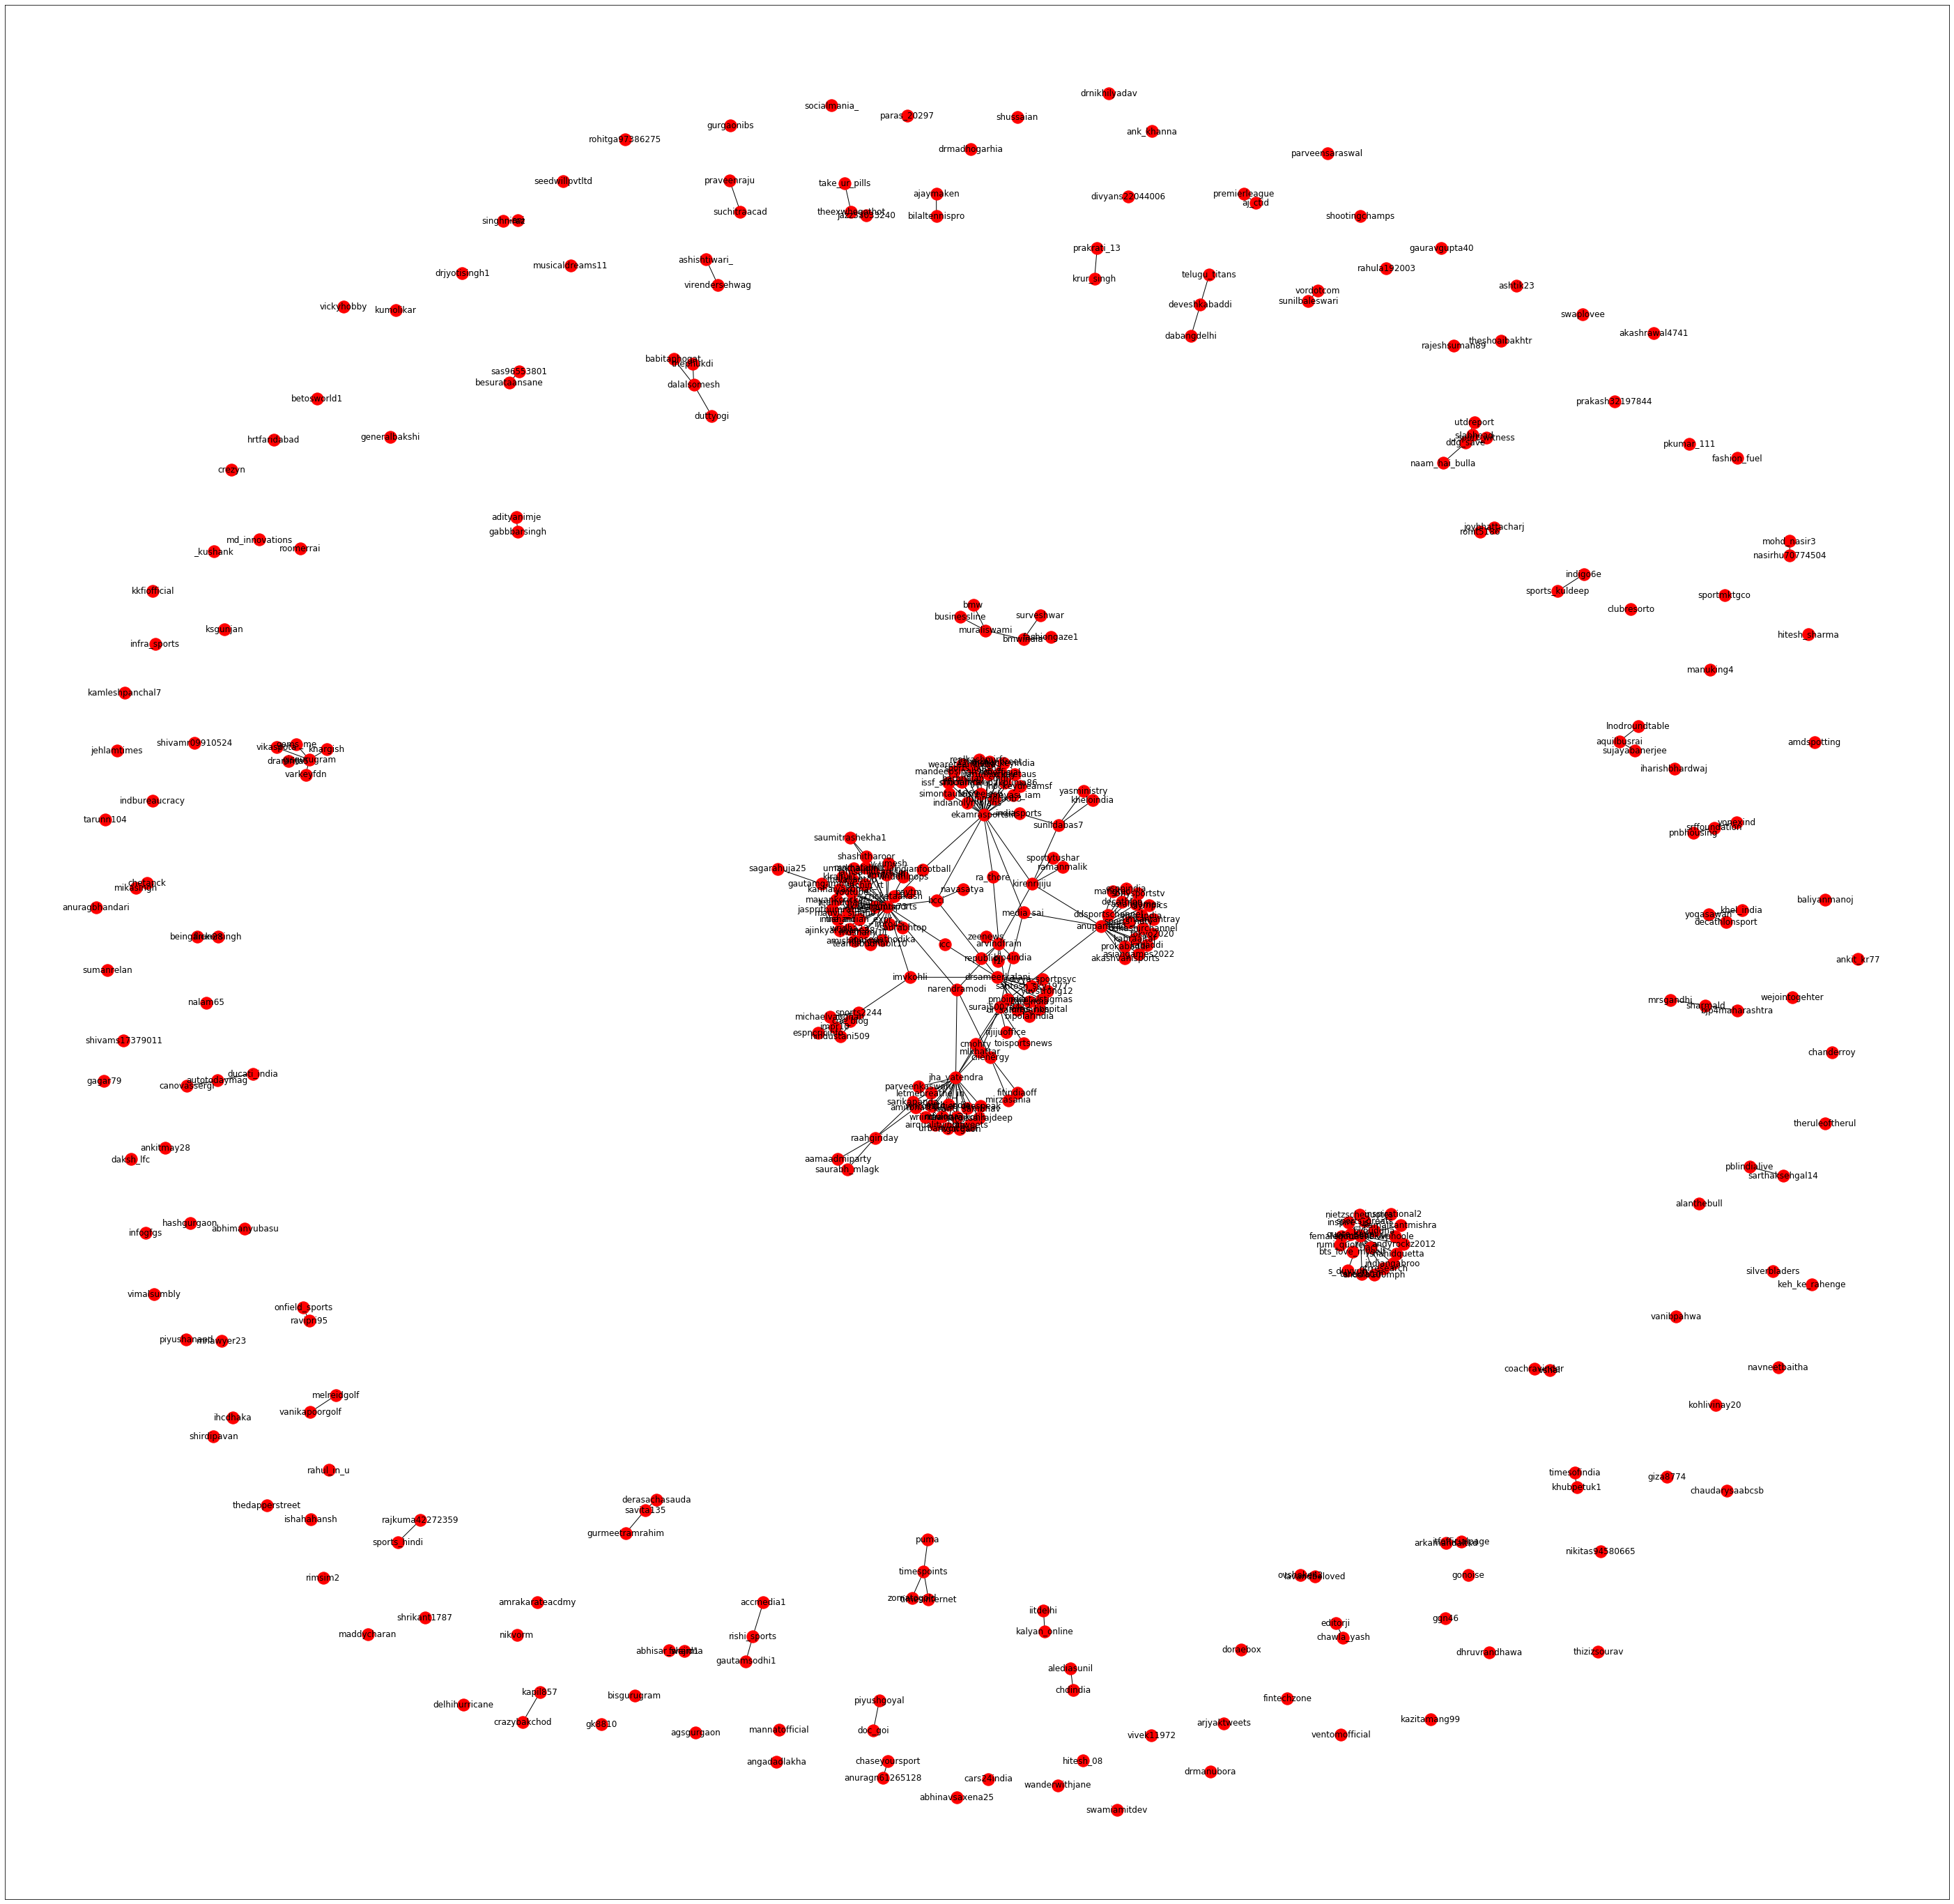

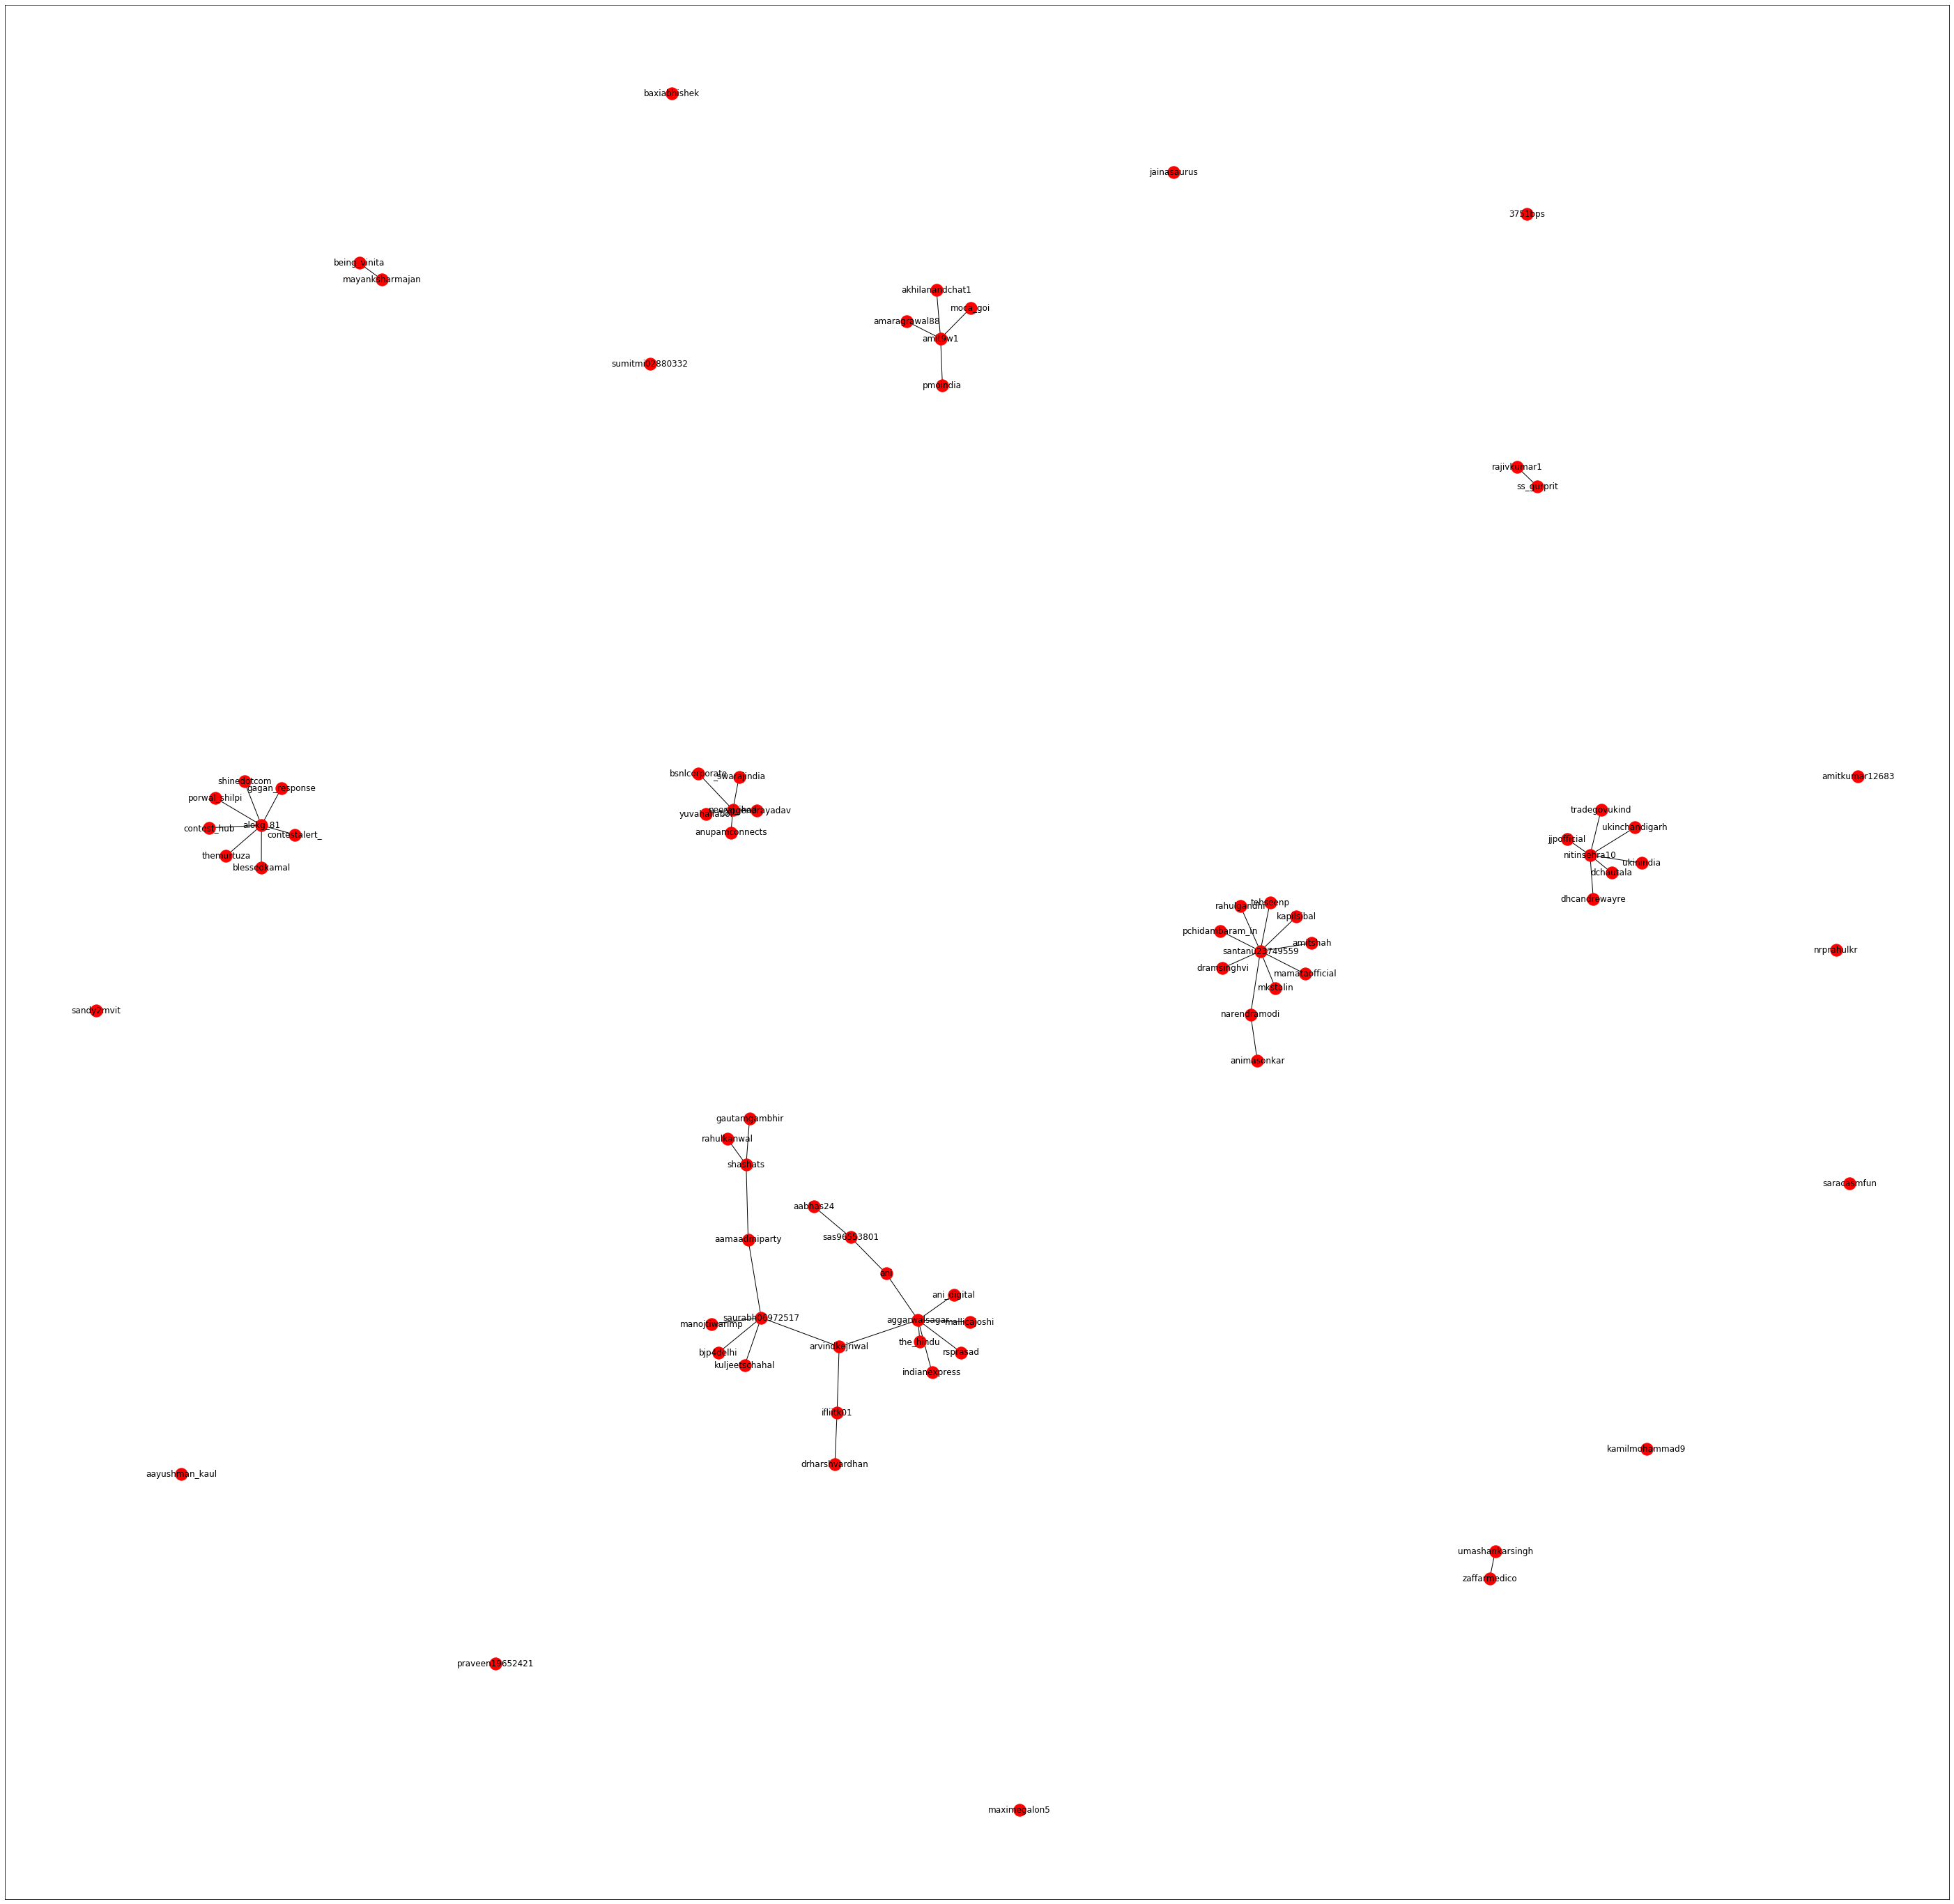

In [12]:
#  = nx.DiGraph()
# graph_unemployment = nx.DiGraph()
graph_health = make_graph("health.csv")
graph_economy = make_graph("economy.csv")
graph_poverty = make_graph("poverty.csv")
graph_crime = make_graph("crime.csv")
graph_sports = make_graph("sports.csv")
graph_education = make_graph("unemployment.csv")



# Degree Analysis

In [13]:
#:-
def stat(graph):
    stats=[]
    size=graph.size(weight="weight")
    size
    num_edges=graph.number_of_edges()
    num_edges
    max_ind=0.000
    max_out=0.000
    sum_in=0.000
    sum_out=0.000
    ind_by_out=0.000
    for node in list(graph.nodes()):
        ind=graph.in_degree(node)
        out=graph.out_degree(node)
        sum_in+=ind
        sum_out+=out
        max_ind=max(max_ind,ind)
        max_out=max(max_out,out)
        if(out!=0):
            ind_by_out+=(ind/out)
    leng=len(list(graph.nodes()))
    avg_ind_by_out=ind_by_out/leng
    avg_in=sum_in/leng
    avg_out=sum_out/leng
    stats.append(size)
    stats.append(num_edges)
    stats.append(max_ind)
    stats.append(max_out)
    stats.append(avg_ind_by_out)
    return stats


health_stats=stat(graph_health)
economy_stats=stat(graph_economy)
education_stats=stat(graph_education)
poverty_stats=stat(graph_poverty)
crime_stats=stat(graph_crime)
sports_stats=stat(graph_sports)




# Compare Degree Distribution

In [14]:
size={}
def make_dict(dicti,i):
    dicti["Education"]=education_stats[i]
    dicti["Economy"]=economy_stats[i]
    dicti["health"]=health_stats[i]
    dicti["poverty"]=poverty_stats[i]
    dicti["sports"]=sports_stats[i]
    dicti["Crime"]=crime_stats[i]
    return dicti
size=make_dict(size,0)
size
edges={}
edges=make_dict(edges,1)
edges
max_out_degree={}
max_out_degree=make_dict(max_out_degree,3)
print(max_out_degree)
max_in_degree={}
max_in_degree=make_dict(max_in_degree,2)
max_in_degree
avg_in_out={}
avg_in_out=make_dict(avg_in_out,4)
avg_in_out

{'Education': 9, 'Economy': 18, 'health': 27, 'poverty': 5, 'sports': 35, 'Crime': 11}


{'Education': 0.0,
 'Economy': 0.0033222591362126247,
 'health': 0.010046113306982872,
 'poverty': 0.015625,
 'sports': 0.013681592039800997,
 'Crime': 0.00223463687150838}

In [15]:
table_values={
    "SIZE":size,
    "EDGES":edges,
    "MAXIMUM IN DEGREE":max_in_degree,
    "MAXIMUM OUT DEGREE":max_out_degree,
    "AVERAGE OUT DEGREE":avg_in_out,
}
table=pd.DataFrame(table_values)


In [16]:
table

SIZE  EDGES  MAXIMUM IN DEGREE  MAXIMUM OUT DEGREE  \
Education  136.0     54                  3                   9   
Economy    312.0    271                 11                  18   
health     518.0    443                 14                  27   
poverty     42.0     42                  2                   5   
sports     310.0    238                  6                  35   
Crime      162.0    155                  5                  11   

           AVERAGE OUT DEGREE  
Education            0.000000  
Economy              0.003322  
health               0.010046  
poverty              0.015625  
sports               0.013682  
Crime                0.002235

In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import ast
import matplotlib.pyplot as plt
def analyse_graph(file_name):
    path = "dataset/" + file_name
    data = pd.read_csv(path) 
    counter=len(data)
    nodes={}
    for i in range(counter):
        nodes[i]=data['username'][i]
    #print(nodes)
    mentions={}
    j=counter

    k=counter
    for i in range(counter):
        res = ast.literal_eval(data['mentions'][i])
        for j in range(len(res)):
            if(len(res[j])>0):
                nodes[k]=res[j]
                k+=1
    unique_users=set(nodes.values())
    user_ind={}
    j=0
    for i in unique_users:
        user_ind[i]=j
        j+=1
    #user_ind  

    ind_to_user={}
    for key in user_ind:
        ind_to_user[user_ind[key]]=key

    arr=np.zeros([len(unique_users),len(unique_users)],dtype=int)
    for i in range(counter):
        user=data['username'][i]
        res = ast.literal_eval(data['mentions'][i])
        for j in res:
            #print(user,"men",j)
            arr[user_ind[user]][[user_ind[j]]]+=1
    val =0
    for i in range (len(unique_users)):
        for j in range (len(unique_users)):
            val = max(val,arr[i][j])

    Graph=nx.Graph()
    DiGraph = nx.DiGraph();
    for i in range(0,len(unique_users)):
        for j in range(0,len(unique_users)):
            if(arr[i][j]>0):
                #print(i,j,arr[i][j])
                Graph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
                DiGraph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
#             else:
#                 if(Graph.has_node(i)==0):
#                     Graph.add_node(ind_to_user[i])
#                 if(Graph.has_node(j)==0):
#                     Graph.add_node(ind_to_user[j])


    #nx.spring_layout(Graph)
    plt.figure(figsize=(50,50))
    #
    return Graph
    #plt.savefig("education.png",format="PNG")



# Visualize  Degree Distribution and Graph (Shows Power Law Distribution)

In [32]:
def power_law(data):
    hgraph=analyse_graph(data)
    degree_dist={}
    # nx.draw_networkx(hgraph,node_size=300, node_color='red', with_labels=True)

    for node in list(hgraph.nodes()):
        if hgraph.degree(node) in degree_dist:
            degree_dist[hgraph.degree(node)]+=1
        else:
            degree_dist[hgraph.degree(node)]=1
    degree_dist

    #for data_dict in degree_dist.values():
    colors=list("rgbcmyk")
    x=list(degree_dist.keys())
    y=list(degree_dist.values())

    # print("x",x,"y",y)
    s = [200*6 for n in range(len(x))]
    plt.scatter(x,y,s=s)
    plt.ylabel('Nodes',size = 80)
    plt.xlabel('Degree',size=80)
    plt.xticks(size = 50)
    plt.yticks(size = 60)
    #plt.plot(x,y)
    plt.show()

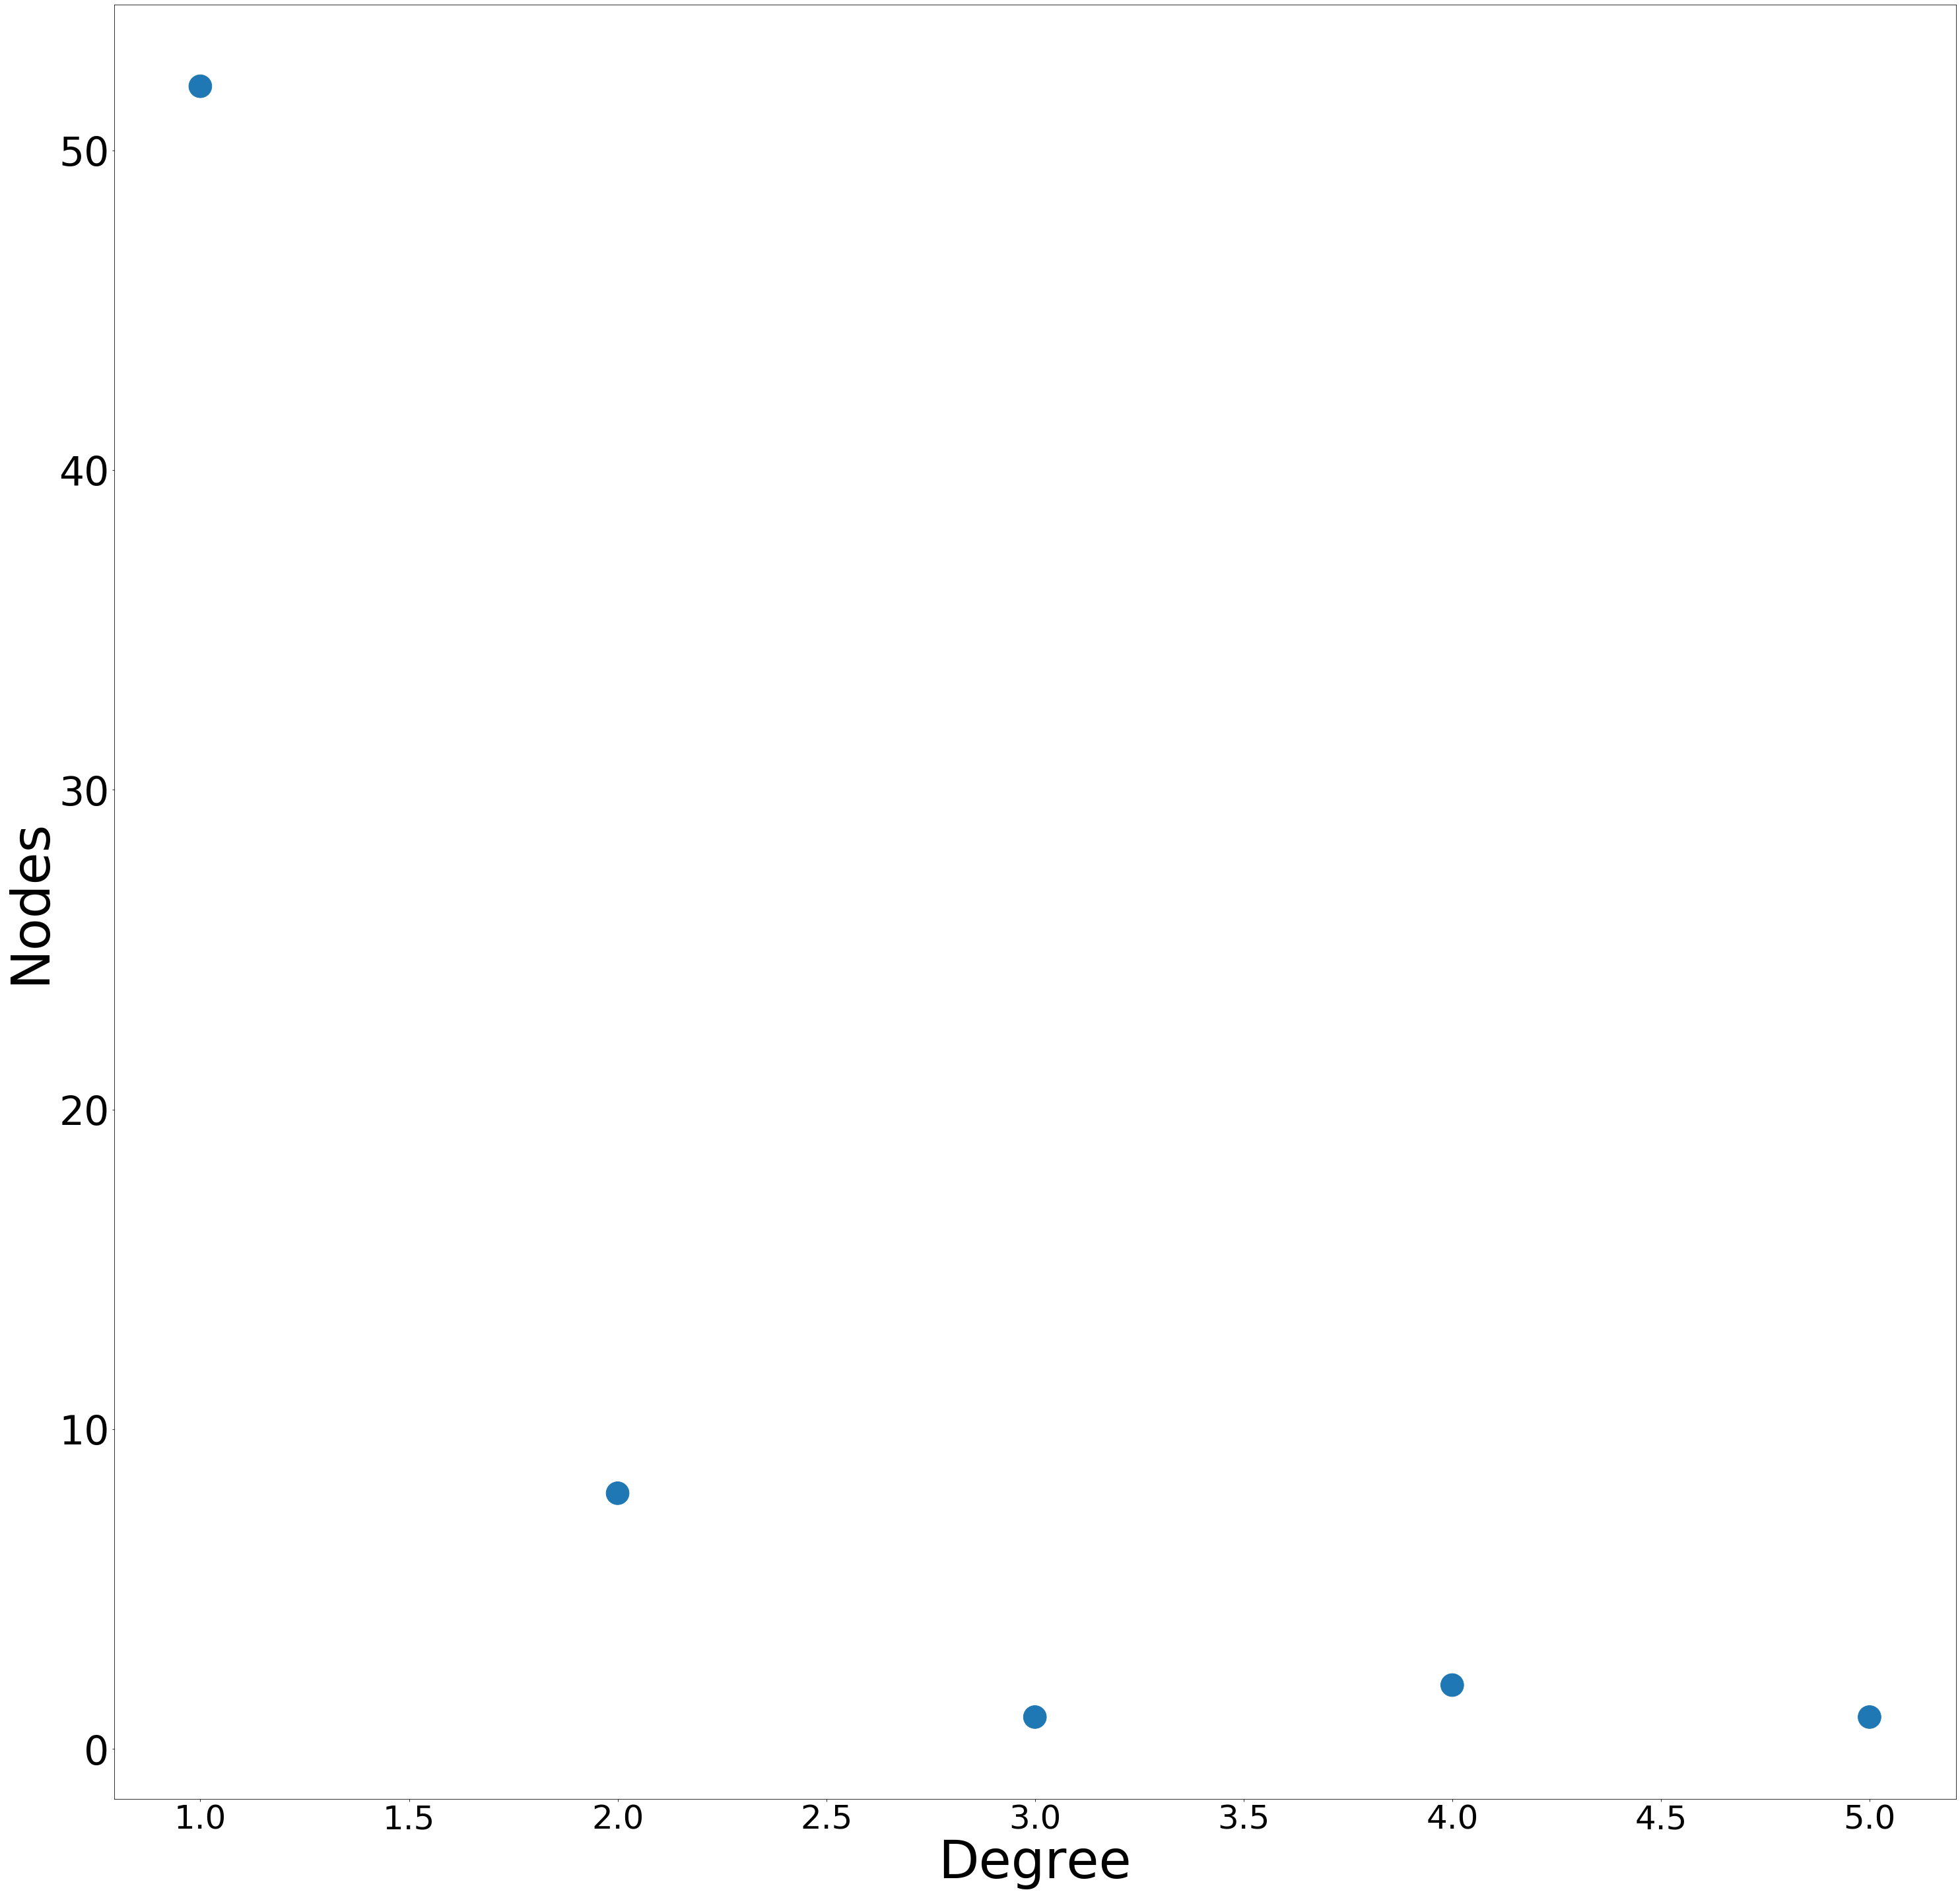

In [33]:
power_law("poverty.csv")



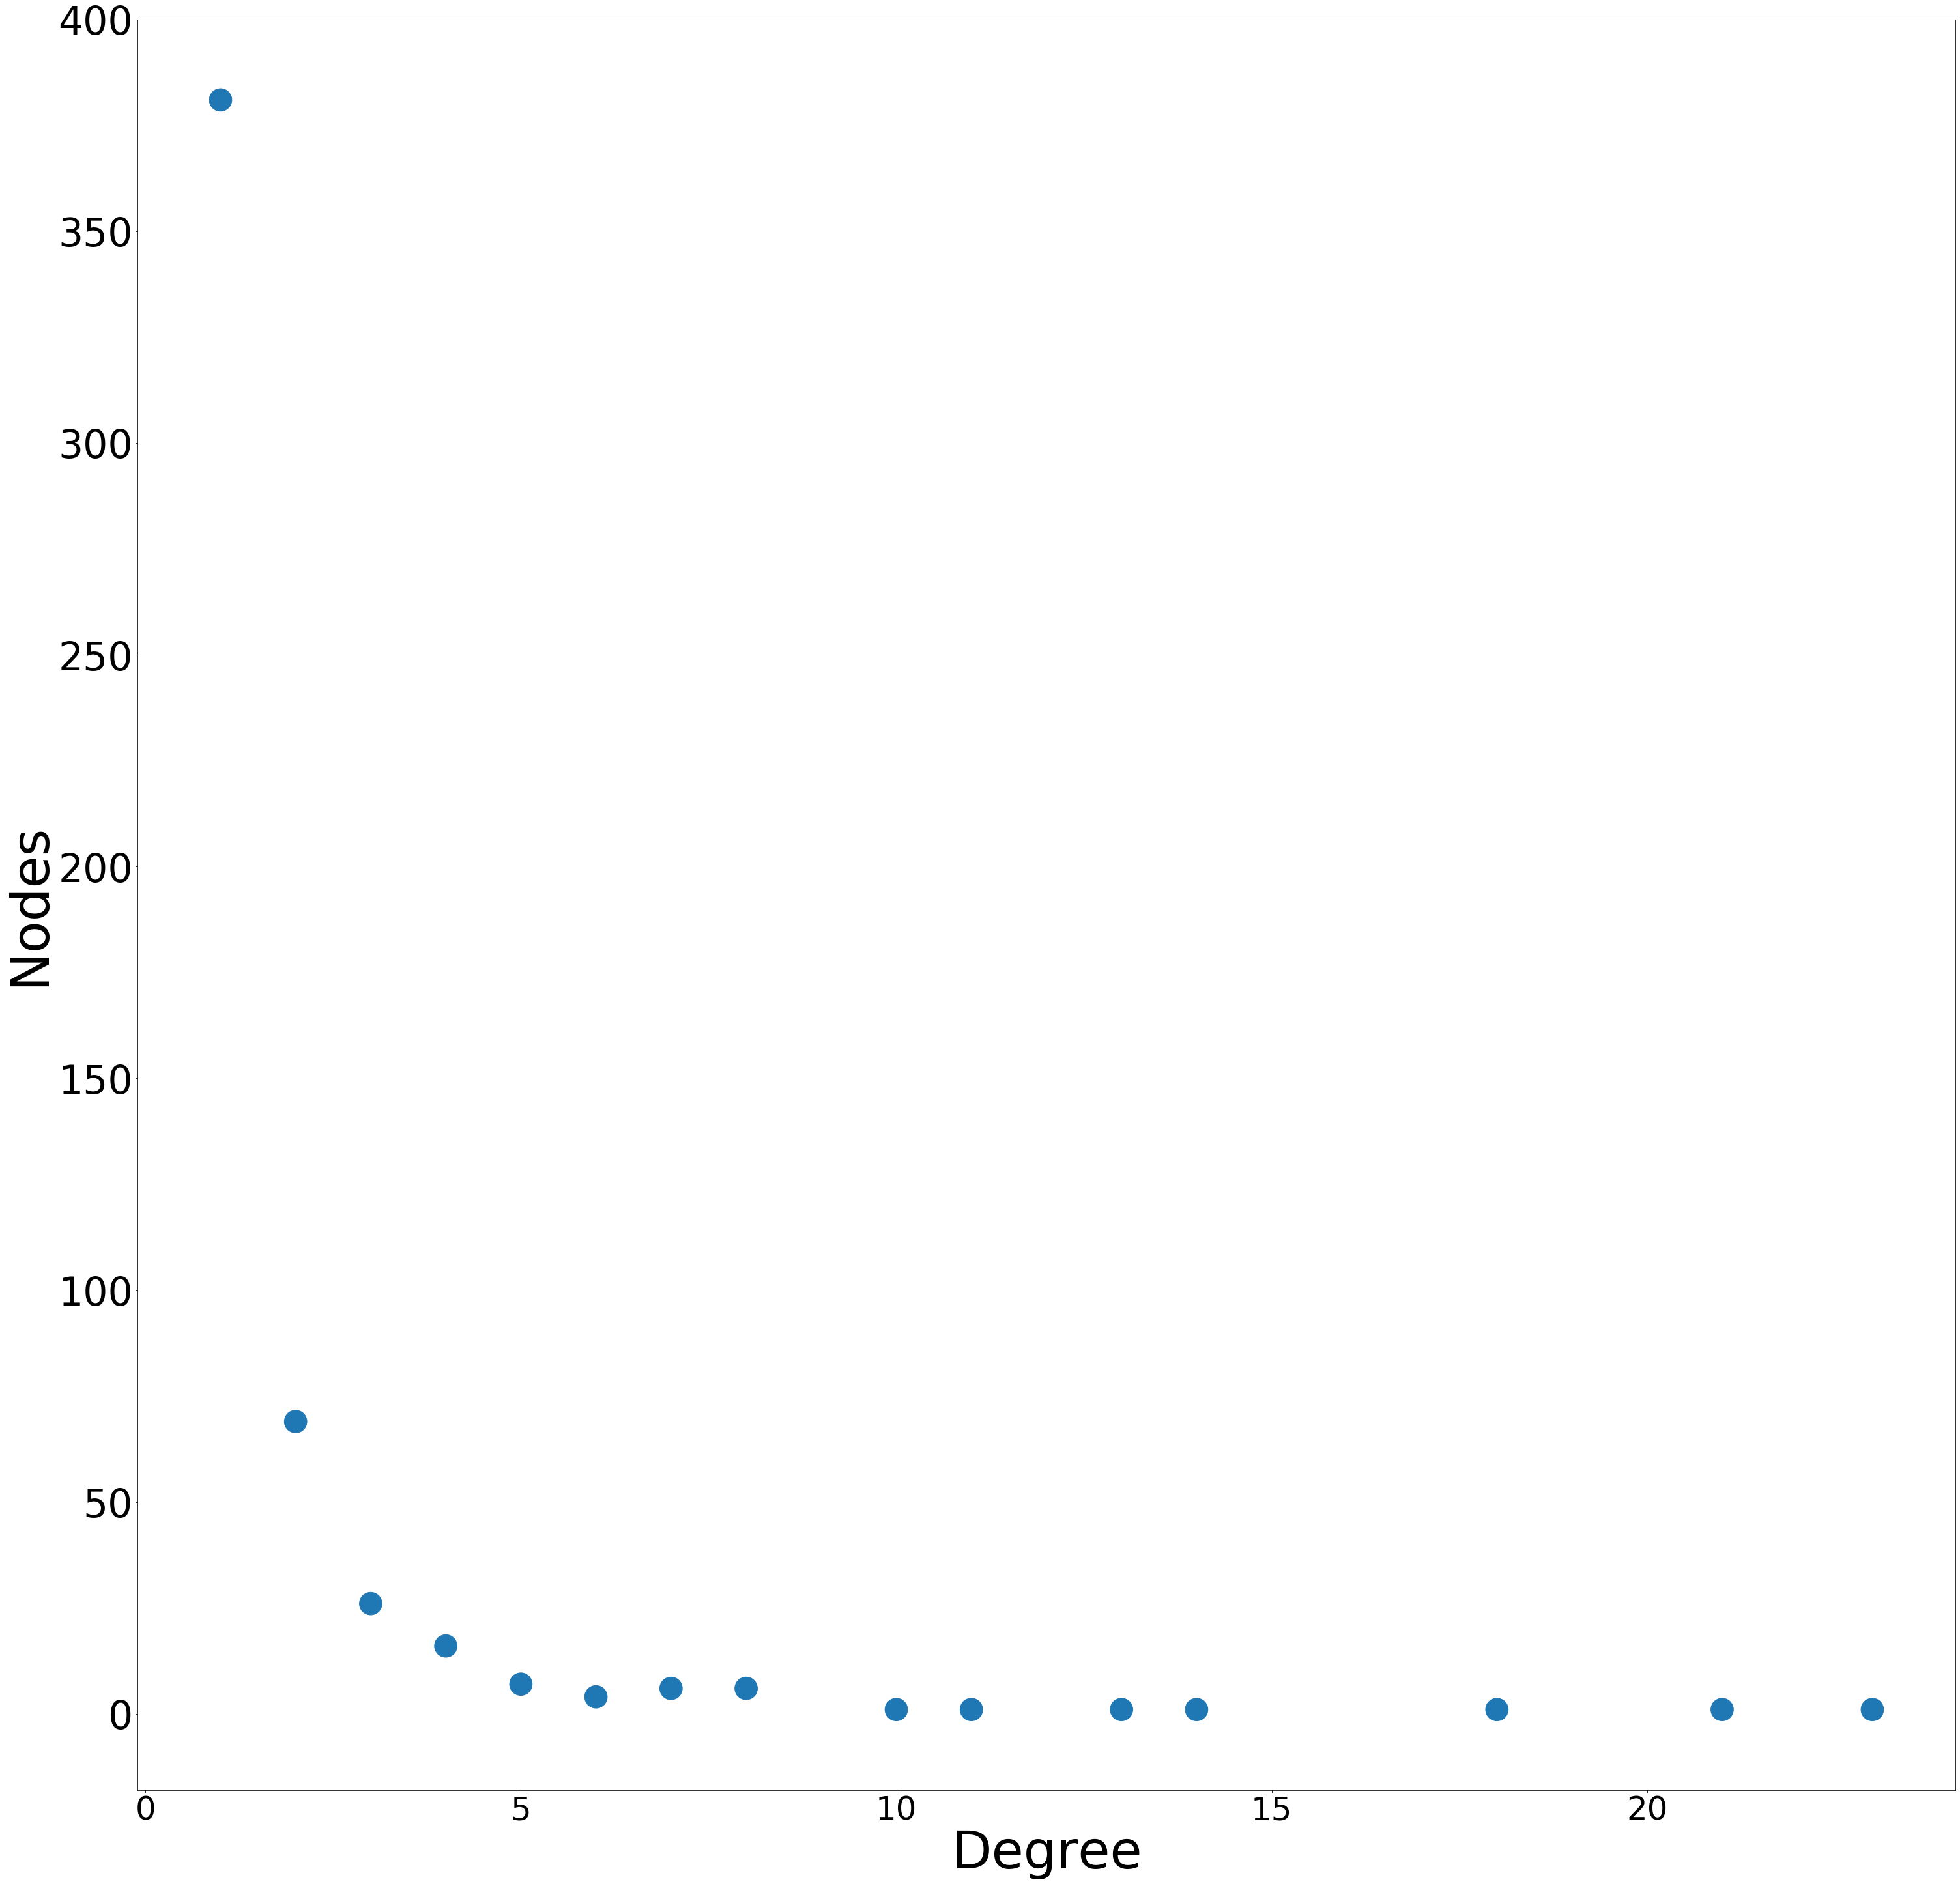

In [27]:
power_law("education.csv")

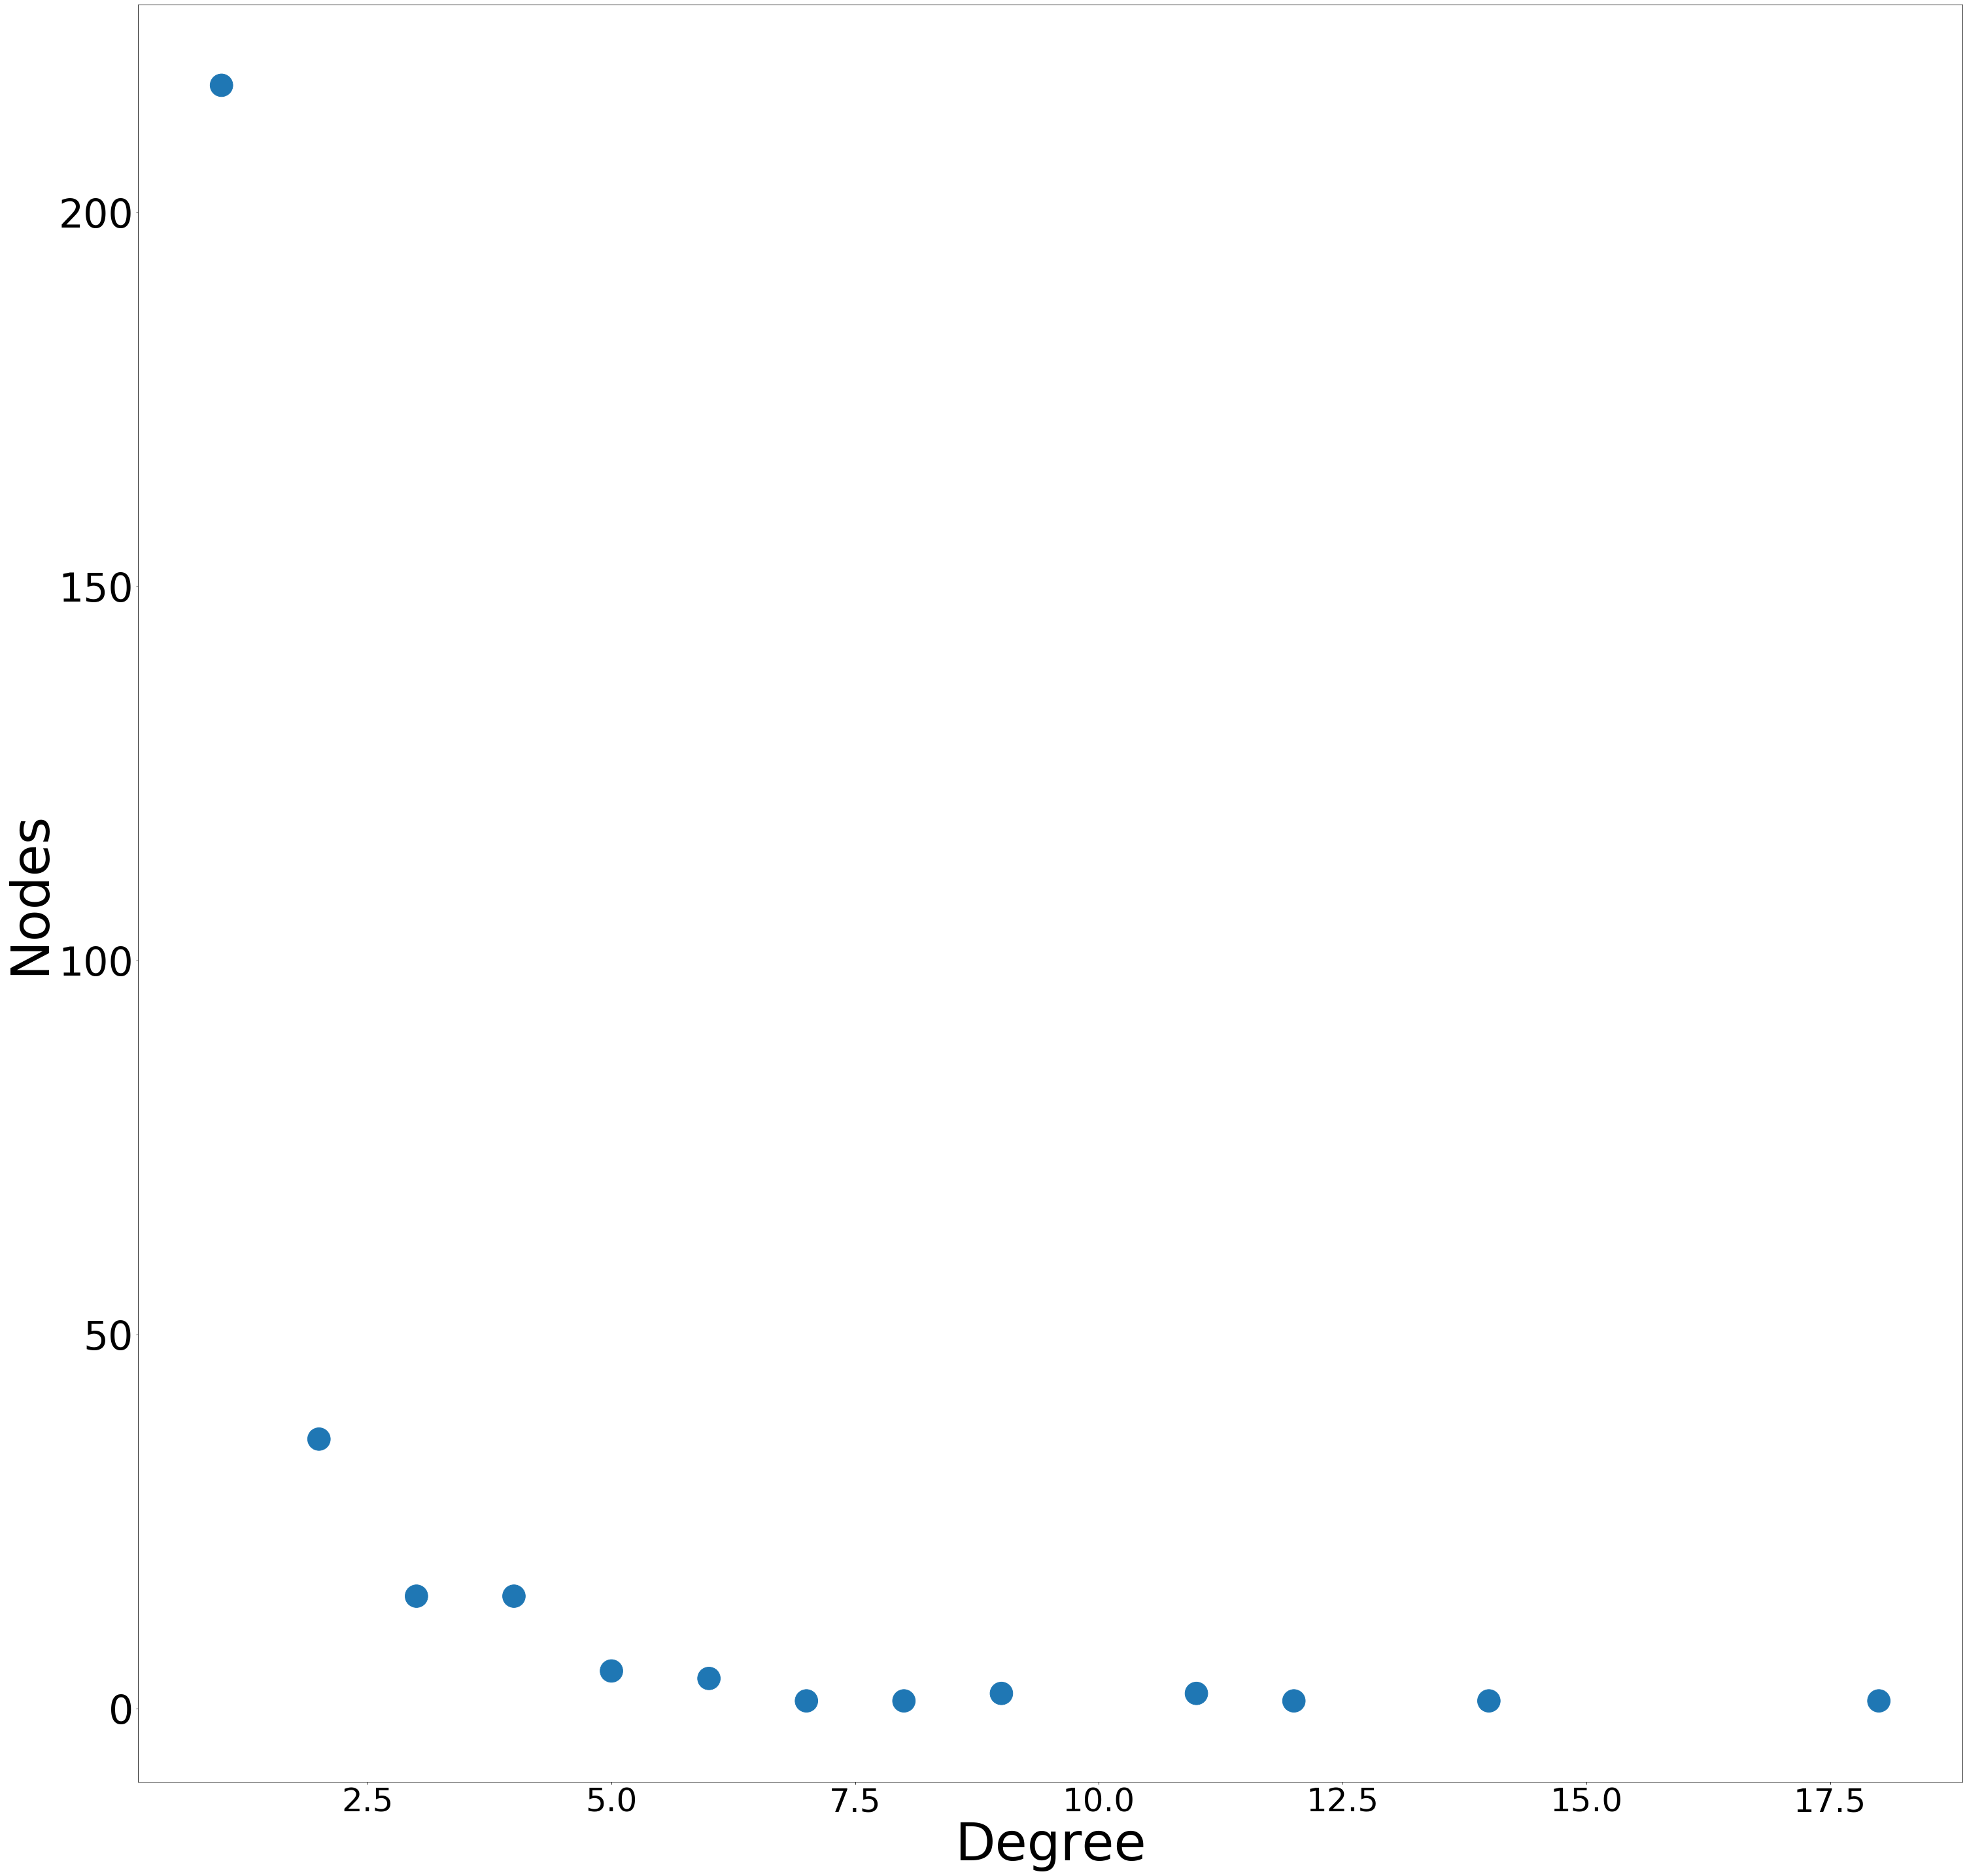

In [28]:
power_law("economy.csv")

# Girvan Newman Community Detection

In [26]:
from networkx.algorithms import community
graph_education=analyse_graph("poverty.csv")
communities_generator = community.girvan_newman(graph_education)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
(sorted(map(sorted, next_level_communities)))
#communities_generator = community.girvan_newman(G)

[['_romilkapoor_', 'cmseth1'],
 ['aabhaaay', 'tajinderbagga'],
 ['aartic02', 'amankannu30', 'corzack3', 'kapsology'],
 ['aitcofficial', 'verycrirical'],
 ['amolmishra20', 'vinirish'],
 ['animasonkar', 'caskumar2'],
 ['arvindkejriwal', 'drharshvardhan', 'ifliitk01'],
 ['aseemy', 'b50'],
 ['besurataansane',
  'kamallochanm',
  'nitin_gadkari',
  'pmoindia',
  'sas96553801'],
 ['ciienergy', 'dpradhanbjp', 'grameenvidyut', 'itootweet', 'pmujjwalayojana'],
 ['digitalisfuture', 'drvaishaliw', 'shunalishroff'],
 ['financialxpress', 'lekhachakrborty', 'mgovindarao12', 'narendramodi'],
 ['futuresanjeev', 'yadavakhilesh'],
 ['gabbbarsingh', 'nicholassykes21', 'turtlemayank'],
 ['gravity_v20'],
 ['gsetia402', 'thesamirabbas'],
 ['guthikonda', 'someshjha7'],
 ['himansh73674363'],
 ['hitesh9914', 'incurableoptim1', 'priyankagandhi'],
 ['jdaiey', 'shootiapa'],
 ['jopan1', 'ziahaq'],
 ['krupage', 'muktanaik'],
 ['mahaanthanos', 'marcosheckler', 'reallyswara'],
 ['myxeffect', 'ndtv'],
 ['rishibagree',

<Figure size 3600x3600 with 0 Axes>

In [41]:
#Centrality Measures:-
from operator import itemgetter
degc = nx.degree_centrality(analyse_graph("economy.csv"))        # Calculating Degree Centrality of the nodes
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('santanu23749559', 0.060000000000000005),
 ('amit9w1', 0.04666666666666667),
 ('vinayak1311', 0.04),
 ('nsitharaman', 0.03666666666666667),
 ('sas96553801', 0.03666666666666667),
 ('narendramodi', 0.030000000000000002),
 ('pmoindia', 0.030000000000000002),
 ('pradeepyad0007', 0.02666666666666667),
 ('ani', 0.023333333333333334),
 ('souravgolu18', 0.02),
 ('lekhachakrborty', 0.02),
 ('shootiapa', 0.02),
 ('ashishdua_inc', 0.02),
 ('shrmindia', 0.016666666666666666),
 ('finminindia', 0.016666666666666666),
 ('unagk', 0.016666666666666666),
 ('atulit', 0.016666666666666666),
 ('kuldeepshamra', 0.016666666666666666),
 ('piyushgoyal', 0.013333333333333334),
 ('amitshah', 0.013333333333333334),
 ('mojitozz', 0.013333333333333334),
 ('airvistara', 0.013333333333333334),
 ('incindia', 0.013333333333333334),
 ('bentinztweetz', 0.013333333333333334),
 ('adcajay', 0.013333333333333334),
 ('rohit_dasgupta', 0.013333333333333334),
 ('rahul25sa', 0.013333333333333334),
 ('tikhiboli', 0.01333333333

<Figure size 3600x3600 with 0 Axes>

In [42]:
#Modi has relatively high degree centrality value
from operator import itemgetter
degc = nx.degree_centrality(analyse_graph("education.csv"))        # Calculating Degree Centrality of the nodes
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('sas96553801', 0.044145873320537425),
 ('animasonkar', 0.04030710172744722),
 ('realnitinarora', 0.0345489443378119),
 ('pmoindia', 0.026871401151631478),
 ('jha_yatendra', 0.02495201535508637),
 ('narendramodi', 0.02111324376199616),
 ('pallavitura', 0.019193857965451054),
 ('ruchidhona', 0.015355086372360844),
 ('msisodia', 0.015355086372360844),
 ('hrdministry', 0.015355086372360844),
 ('arvindkejriwal', 0.015355086372360844),
 ('gisgurugram', 0.015355086372360844),
 ('bhaveshsw', 0.015355086372360844),
 ('gabbbarsingh', 0.013435700575815739),
 ('shyamantikas', 0.013435700575815739),
 ('abhimann_', 0.013435700575815739),
 ('ramanswall', 0.013435700575815739),
 ('drjayashukla', 0.013435700575815739),
 ('poorviseth03', 0.013435700575815739),
 ('harikeshverma33', 0.011516314779270634),
 ('bhuwan2019', 0.011516314779270634),
 ('tejbirrapria', 0.011516314779270634),
 ('arun_kumar100', 0.011516314779270634),
 ('aajtak', 0.009596928982725527),
 ('parfectshot', 0.009596928982725527),
 ('a

<Figure size 3600x3600 with 0 Axes>

# Ego Network Analysis

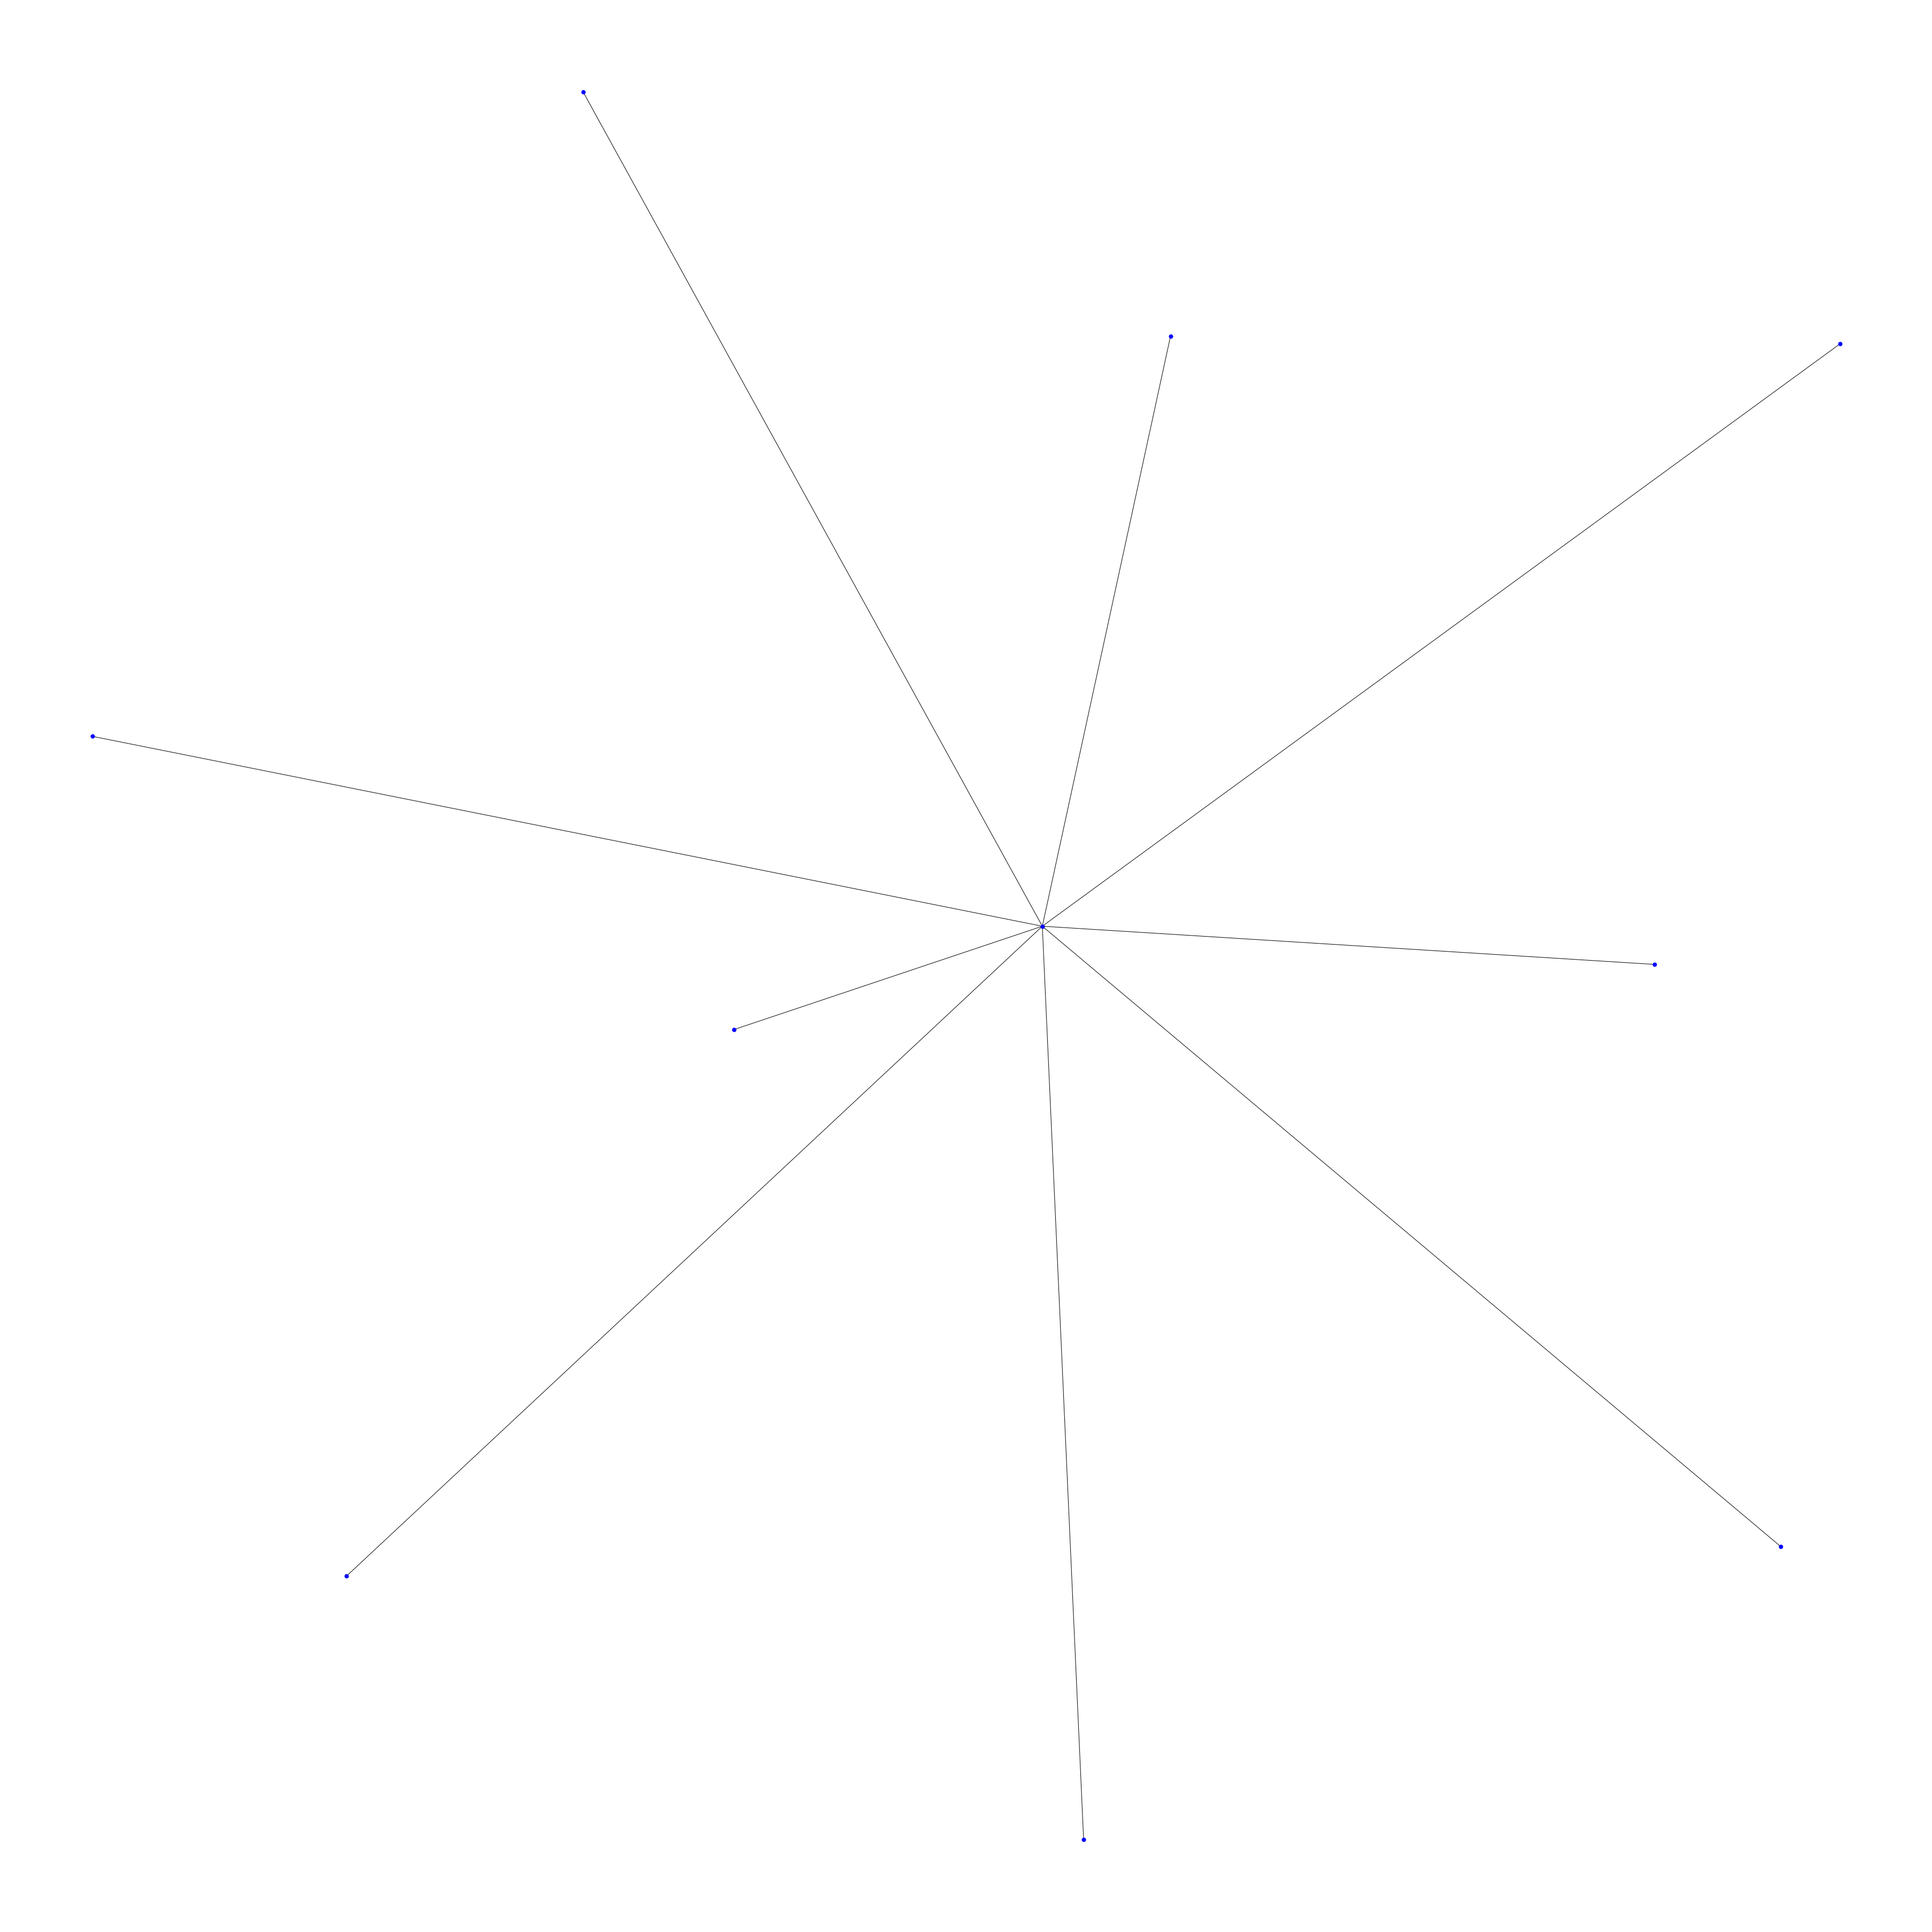

In [43]:
#Ego network:-
s='narendramodi'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(analyse_graph("economy.csv"),s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
#plt.savefig('Medici.png')
plt.show()